# Handling Missing Values

**Table of Contents**

* [Introduction](#chapter1)
* [Types of Missing Data](#chapter2)
* [Import Libraries](#import-libraries)
* [Define Functions](#define-functions)
* [Dataset](#chapter3)
* [Missing Value Analysis](#chapter4)
* [Methods](#chapter5)
    * [5.1. Ignoring Missing Data](#subsection1)
    * [5.2. Delete Missing Data](#subsection2)
    * [5.3. Statistically Filling Missing Data (Mean-Median-Constant)](#subsection3)
    * [5.4. Other Filling Methods (Forward Fill - Backward Fill - Linear (Interpolation))](#subsection4)
    * [5.5. Advanced Imputation Techniques (Prediction of Missing Values) (KNN - Linear Regression - Random Forest Regressor)](#subsection5)
* [6. Evaluation Results: Comparison of Methods for Missing Data ](#6-evaluation-results-comparison-of-methods-for-missing-data)
* [7. Filling Methods for Times Series Data (Forward Fill, Backward Fill, Linear Interpolation, and Moving Averages)](#7-filling-methods-for-times-series-data-forward-fill-backward-fill-linear-interpolation-and-moving-averages)

# 1. Introduction <a class="anchor"  id="chapter1"></a>

The presence of incomplete data is a common problem in most intelligent systems applications, limiting the implementation and analysis of statistical and machine learning models ([Lin & Tsai, 2020](https://www.sciencedirect.com/science/article/pii/S0957417422006637#b32)). To minimize the loss of efficiency and the bias that arise from removing rows with missing data, statisticians recommend the use of imputation algorithms ([Horton & Kleinman, 2007](https://www.sciencedirect.com/science/article/pii/S0957417422006637#b25)). These algorithms use the observed data to estimate values that can replace the missing values ([Garciarena & Santana, 2017](https://www.sciencedirect.com/science/article/pii/S0957417422006637#b19)).

Missing values are usually attributed to: human error when processing data, machine error due to the malfunctioning of equipment, respondents refusal to answer certain questions, drop-out in studies and merging unrelated data. The missing values problem is usually common in all domains that deal with data and causes different issues like performance degradation, data analysis problems and biased outcomes lead by the differences in missing and complete values. [Emmanuel, T., Maupong, T., Mpoeleng, D](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00516-9)


To mitigate this, we must either remove missing values carefully or use appropriate techniques to impute them.

The strategies we choose can inadvertently introduce bias into our datasets if missing data is not handled correctly. Bias occurs when certain patterns or characteristics in the data are systematically distorted, leading to results that are not representative of the true underlying relationships.

Bias can be introduced in the following scenarios:

- **Data Removal**: If rows with missing values are removed without considering their significance, we may eliminate important information.
    * Example: if high-income individuals are less likely to report their income (resulting in missing data), simply dropping these records may skew the dataset towards lower income levels, leading to biased insights.
- **Imputation Techniques**: Imputing missing values can also introduce bias. For example, using the mean to fill missing values in a skewed dataset can distort the distribution and misrepresent the data's central tendency. Similarly, using values from related variables may not accurately reflect the missing values, especially if the relationship is weak or non-linear.
    * *Note that using median imputation in skewed distributions may be more appropriate than mean imputation.*
- **Ignoring Patterns of Missingness**: If the missing data follows a specific pattern (e.g., MAR or MNAR), failing to account for this when applying imputation techniques can lead to biased estimates.
    * Example: if higher-income individuals do not report their income, imputing missing values based on lower-income respondents may not yield valid results.
- **Overfitting**: In some cases, particularly when using advanced imputation techniques like KNN or MICE, there is a risk of overfitting to the imputed values. This can create a model that performs well on training data but poorly on unseen data, leading to misleading conclusions.

The goal is to **create a complete and reliable dataset** that supports robust analysis. Ignoring missing data can compromise model performance and reliability, making it crucial to understand and apply the right strategies.

Common causes of missing data include merging different data sources, measurement errors, lack of records, or respondents' unwillingness to provide information.

# 2. Missing Data Mechanisms <a class="anchor"  id="chapter2"></a>

Missing data types are categorized into 3 groups in the literature:

**a. Missing Completely At Random (MCAR)**
In the MCAR case, there is no relationship between the missing data and the other values in the data set. In other words, the missing values are completely independent of the other data. As the missing values increase, the overall information content of the data set decreases. This can affect the accuracy and reliability of the analysis results.

- Examples:
    * A sensor fails randomly without any influence from the environment.
    * Suppose in a survey, some responses are missing because the survey forms were randomly damaged. This missingness has no connection to the responses or the participants.
- How to handle:
    * No bias; use simple methods like listwise deletion without concerns.

**b. Missing At Random (MAR)**
MAR is a type of missing data where the missing data is correlated with other observed values. In this case, missing data does not occur randomly, but is missing according to a specific pattern. This pattern can be explained by a variable for which we have information about the cause of the missingness. If missing data of this type is ignored, the results of the analysis may not reflect the real situation.

- Examples:
    * Someone choose not to disclose their age when conducting a survey. The missing age values are not completely random; they are correlated with another variable that you do know (in this case, income).
    * In a health dataset, suppose patients with more severe symptoms (an observable factor) are less likely to report their weight. Here, missing weights depend on the severity of symptoms (observed data) but not directly on the missing weights themselves.
- How to handle:
    * Imputation based on observed data works well.

**c. Missing Not At Random (MNAR)**
MNAR is a type of missing data where the missing data is due to unobserved data and cannot be explained by other observed data. If there is a structure or pattern in the missing data and this pattern cannot be explained by the observed data, it can be categorized as MNAR.

- Examples:
    * Higher income individuals are less likely to disclose their earnings. The likelihood of not answering the income question depends on the actual income level itself. For example, people with higher incomes might be less willing to disclose their income because they feel uncomfortable revealing it, or because of privacy concerns.
    * In a psychological study, individuals with higher levels of anxiety (a missing value) are less likely to complete a self-report questionnaire. Here, missingness is influenced by the unobserved anxiety levels.
- How to handle:
    * Requires domain expertise and advanced modeling to hypothesize relationships.

The mechanisms that lead to missing values in data significantly affect the assumptions underlying most methods for handling missing data. In the literature, missing data has been categorized according to these mechanisms. Rubin established the theory of missing data, classifying it into three primary mechanisms based on the relationship between available and missing data. 

To define missingness, let $Y$ represent a matrix of the entire dataset, decomposed into $Y_{obs}$ and $Y_{miss}$, which denote the observed and missing data, respectively. Let $R$ denote a missing value matrix, defined as follows:

Let $q$ be a vector of values indicating the association between missingness in $R$ and the dataset $Y$. The missing value mechanisms are therefore defined by the probability of whether a value is observed or missing, as outlined below.

## Missing Completely at Random (MCAR)
This situation occurs when the missing observations are independent of both observed and unobserved measurements (the probability of a value being missing is entirely unrelated to either the observed data or the missing data itself). The probability of MCAR is defined as:

$$P(Y_{miss}) = 0$$

This implies that missingness has no systematic relationship with any variable.

## Missing at Random (MAR)
In this case, the likelihood of a missing value is related only to the observable data. The probability for MAR can be defined as:

$$P(Y_{miss} | Y_{obs}) \neq 0$$

Missingness depends only on observable data.

MAR is commonly encountered in health science datasets, where missing values can be handled by observed predictor variables.

## Missing Not at Random (MNAR)
This mechanism refers to cases where missing data is neither MCAR nor MAR. Here, the missing data is influenced by both missing and observed values, making it challenging to handle missing values since it relies on unseen data. The probability for MNAR is defined as:

$$P(R | Y_{obs}, Y_{miss}) \neq 0$$

Missingness depends on both observed and missing data.

The probability of whether a position in $R$ is missing or observed depends on both $Y_{obs}$ and $Y_{miss}$. This mechanism is predominantly applied in various domains, particularly in (bio)medicine, but also in psychological and educational datasets.

According to Graham and Dantan et al., it is often impossible to categorically assign missing data to these three mechanisms. This is due to the challenge of assuming that missing data is entirely unrelated to non-missing variables; in reality, missing values often relate to them. Many researchers report that the most straightforward approach is to assume that all missing data can be treated as MAR to some extent, as MAR occupies a middle ground in this continuum.


## Why Categorization is Challenging

- **Blurred Lines**: In practice, it can be difficult to determine whether missingness is strictly MCAR, MAR, or MNAR. For instance:
    * MCAR assumes no relationship exists, which is rare.
    * MAR assumes relationships exist but only with observed data, which may oversimplify reality.
    * MNAR acknowledges the most complex scenarios but requires knowledge about unobservable variables.
- **Research Assumptions**:
    * Many researchers opt to treat missing data as MAR because it’s a practical middle ground.
    * Treating data as MAR allows for statistical methods like multiple imputation or maximum likelihood to address the missingness.


# Common Approaches to Handling Incomplete Data
Researchers typically apply two or three common solutions to address incomplete data. The **first approach** involves **omitting instances with missing values** (i.e., listwise deletion), which significantly reduces the dataset's size while ignoring the mechanism behind the missingness. A smaller sample size increases the likelihood of nonsignificant results, as larger samples generally provide greater statistical power.

The **second approach** involves **imputing (or estimating) missing values based on the available data**. However, single imputation methods have a limitation: they tend to underestimate uncertainty, leading to invalid statistical tests and confidence intervals, since the estimated values are derived from the existing data (Little and Rubin, [1987](https://books.google.es/books?hl=en&lr=&id=BemMDwAAQBAJ&oi=fnd&pg=PR11&ots=FCAX7WDZXY&sig=QKXx-MjCEcthqC4oc1WDZR3_014&redir_esc=y#v=onepage&q&f=false)).

A **third category**, increasingly recognized, includes **machine-learning-based methods** for handling missing data, which offer more sophisticated alternatives to the traditional techniques.

# Practical Exercise: Handling Missing Data using UCI Heart Disease Data

# Import Libraries

In [5]:
# Download kaggle data
import kagglehub

# Classical Libraries
import pandas as pd
import os
import numpy as np
import random

# Missing Data
import missingno as msno

# Independence
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

#
from xgboost import XGBClassifier, DMatrix

# Plot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Modeling
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For converting categorical data to numerical values
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score # For calculating the accuracy score of a classification model
from sklearn.impute import KNNImputer # For imputing missing values using K-Nearest Neighbors
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier model
from sklearn.impute import SimpleImputer # For imputing missing values with a simple strategy
from xgboost import XGBClassifier # XGBoost classification model


c:\Users\sopor\anaconda3\envs\cupsenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define Functions

In [6]:
def NaNs_Information(df):
        # Actual Missing Values
        mis_val = df.isnull().sum()
        
        # Calculate % of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the df
        return mis_val_table_ren_columns

def encode(data):
    '''Function to encode non-null data and replace it in the original data'''
    # Initialize the OrdinalEncoder
    encoder = OrdinalEncoder()
    
    # Retains only non-null values
    nonulls = np.array(data.dropna())
    # Reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1, 1)
    # Encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    
    # Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

def read_pre_process_data():
    """
    Reads the 'Heart Disease' dataset, performs necessary preprocessing steps, 
    and returns the cleaned dataset.

    Returns:
    - pd.DataFrame
        A DataFrame containing the preprocessed 'Heart Disease' dataset.
    """
    
    # Download latest version
    path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
    # print("Files in the dataset directory:", files)

    uci_data = pd.read_csv(path+'/heart_disease_uci.csv')
    
    # Edit the data
    uci_data_treated = uci_data.copy()
    # Target: will be transformed from categorical into binary (presence/abscense of a heart desease)
    uci_data_treated['num'] = uci_data_treated['num'].replace({2: 1, 3: 1, 4: 1})
    # Drop unnecesary columns
    uci_data_treated = uci_data_treated.drop('id', axis=1)


    # Encode categorical columns
    categorical_columns = uci_data_treated.select_dtypes(include=['object']).columns
    uci_data_treated[categorical_columns] = uci_data_treated[categorical_columns].apply(encode)
    
    
    uci_data_treated[categorical_columns] = uci_data_treated[categorical_columns].apply(lambda x: x.astype(float))
    
    uci_data_treated[['sex', 'dataset', 'cp']] = uci_data_treated[['sex', 'dataset', 'cp']].apply(lambda x: x.astype(int))
    
    # Categorical columns
    # uci_data_treated[uci_data_treated.select_dtypes(['object']).columns] = uci_data_treated.select_dtypes(['object']).apply(lambda x: x.astype('category'))

    return uci_data, uci_data_treated, categorical_columns

def split_dataset(df):
    """
    Splits the dataset into training and testing sets.
    
    Parameters:
    - df (pd.DataFrame): The input dataset.
    
    Returns:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    """
    X = df.drop('num', axis=1)
    y = df['num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(f'Size of the Train: {X_train.shape[0]}')
    # print(f'Size of the Test: {X_test.shape[0]}')
    return X_train, X_test, y_train, y_test

def impute_NaNs(X_train, y_train, X_test, y_test, strategy_cat, strategy_num, cat_cols=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']):
    """
    Handles missing values in the training and testing datasets by imputing them 
    according to the specified strategy. It then trains a Random Forest model 
    using the imputed data and evaluates the model's accuracy on the test set.
    
    Parameters:
    - X_train, y_train: Features and labels for the training set.
    - X_test, y_test: Features and labels for the testing set.
    - strategy_cat (str): Imputation strategy for categorical features ('most_frequent', 'constant', etc.).
    - strategy_num (str): Imputation strategy for numerical features ('mean', 'median', etc.).
    
    Returns:
    - accuracy (float): The accuracy score of the model evaluated on the test set.
    """

    # Create copies of the original datasets
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    # Identify numerical and categorical columns
    categorical_columns = cat_cols
    numerical_columns = [col for col in X_train.columns if col not in cat_cols]

    # Convert categorical columns to object type
    X_train_copy[categorical_columns] = X_train_copy[categorical_columns].astype('object')
    X_test_copy[categorical_columns] = X_test_copy[categorical_columns].astype('object')

    # Impute missing values for numerical columns using the specified strategy
    imputer_num = SimpleImputer(strategy=strategy_num)
    X_train_imputed_num = pd.DataFrame(imputer_num.fit_transform(X_train_copy[numerical_columns]), columns=numerical_columns)
    X_test_imputed_num = pd.DataFrame(imputer_num.transform(X_test_copy[numerical_columns]), columns=numerical_columns)
    
    # Impute missing values for categorical columns using the specified strategy
    imputer_cat = SimpleImputer(strategy=strategy_cat)
    X_train_imputed_cat = pd.DataFrame(imputer_cat.fit_transform(X_train_copy[categorical_columns]), columns=categorical_columns)
    X_test_imputed_cat = pd.DataFrame(imputer_cat.transform(X_test_copy[categorical_columns]), columns=categorical_columns)

    # Apply label encoding to categorical columns (after imputation)
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        X_train_imputed_cat[col] = label_encoder.fit_transform(X_train_imputed_cat[col])
        X_test_imputed_cat[col] = label_encoder.transform(X_test_imputed_cat[col])
    
    # Combine the imputed numerical and categorical features
    X_train_imputed = pd.concat([X_train_imputed_num, X_train_imputed_cat], axis=1)
    X_test_imputed = pd.concat([X_test_imputed_num, X_test_imputed_cat], axis=1)

    # Train a Random Forest model on the imputed training set
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_imputed, y_train)

    # Evaluate the model on the imputed test set
    y_pred = rf_model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
        
    print(f"\n\nImputation strategy for numerical features: {strategy_num}")
    print(f"Imputation strategy for categorical features: {strategy_cat}")
    print(f"Accuracy: {accuracy}\n")
    
    return accuracy, X_train_imputed

def constant_imputer(X_train, y_train, X_test, y_test, constant_value=999,
                     cat_cols=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']):
    """
    Imputes missing values in the training and testing datasets using a constant value for numerical
    and categorical columns, trains a Random Forest model, and evaluates its performance on the test set.
    
    Parameters:
    - X_train (DataFrame): Features for the training set, which may contain missing values.
    - y_train (Series): Labels for the training set.
    - X_test (DataFrame): Features for the testing set, which may contain missing values.
    - y_test (Series): Labels for the testing set.
    - constant_value (numeric): Constant value to replace missing values in numerical columns.
    - constant_cat_value (str): Constant value to replace missing values in categorical columns.
    
    Returns:
    - accuracy (float): Accuracy score of the model on the test set.
    - X_train_imputed (DataFrame): Training features after imputation.
    """
    
    # Separate columns into numerical and categorical
    categorical_columns = cat_cols
    numerical_columns = [col for col in X_train.columns if col not in cat_cols]
    
    # Convert categorical columns to object type
    X_train[categorical_columns] = X_train[categorical_columns].astype('object')
    X_test[categorical_columns] = X_test[categorical_columns].astype('object')


    
    # Impute missing values for numerical columns with constant_value
    imputer_num = SimpleImputer(strategy='constant', fill_value=constant_value)
    X_train_imputed_num = pd.DataFrame(imputer_num.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
    X_test_imputed_num = pd.DataFrame(imputer_num.fit_transform(X_test[numerical_columns]), columns=numerical_columns)
    
    # Impute missing values for categorical columns with most_frequent value
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X_train_imputed_cat = pd.DataFrame(imputer_cat.fit_transform(X_train[categorical_columns]), columns=categorical_columns)
    X_test_imputed_cat = pd.DataFrame(imputer_cat.fit_transform(X_test[categorical_columns]), columns=categorical_columns)


    # Combine the imputed numerical and categorical features
    X_train_imputed = pd.concat([X_train_imputed_num, X_train_imputed_cat], axis=1)
    X_test_imputed = pd.concat([X_test_imputed_num, X_test_imputed_cat], axis=1)

    # Train a Random Forest model on the imputed training set
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_imputed, y_train)

    # Evaluate the model on the imputed test set
    y_pred = rf_model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\nAccuracy: {accuracy}\n")
    
    return accuracy, X_train_imputed

def linear_regression_imputation(df, target_col, feature_cols):
    """
    Imputes missing values in the target column using linear regression.

    This function builds a linear regression model based on the provided feature columns
    to predict and fill in the missing values in the specified target column.

    Parameters:
    - df (pd.DataFrame): The input dataset containing missing values.
    - target_column (str): The name of the target column with missing values to be imputed.
    - feature_columns (list): A list of feature columns used to predict the missing values in the target column.

    Returns:
    - pd.DataFrame: The dataset with imputed missing values in the target column.
    """
    # Separate missing and non-missing values
    df_missing = df[df[target_col].isnull()]
    df_not_missing = df.dropna(subset=[target_col])

    # Create training and test sets for the model
    X_train = df_not_missing[feature_cols]
    y_train = df_not_missing[target_col]

    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values using the model
    X_missing = df_missing[feature_cols]
    predicted_values = model.predict(X_missing)

    # Create a dataset with imputed missing values
    df_filled = df.copy()
    df_filled.loc[df[target_col].isnull(), target_col] = predicted_values

    return df_filled

def knn_imputation(X_train, X_test, y_train, y_test, k=5):
    """
        Imputes missing values using the K-Nearest Neighbors (KNN) algorithm.

        Parameters:
        - X_train (pd.DataFrame): Training dataset containing features with potential missing values.
        - X_test (pd.DataFrame): Testing dataset containing features with potential missing values.
        - y_train (pd.Series): Training labels corresponding to X_train.
        - y_test (pd.Series): Testing labels corresponding to X_test.
        - k (int): The number of nearest neighbors to consider for imputation.

        Returns:
        - Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]: A tuple containing:
        - X_train_imputed (pd.DataFrame): The training dataset with imputed missing values.
        - X_test_imputed (pd.DataFrame): The testing dataset with imputed missing values.
        - y_train (pd.Series): Unchanged training labels.
        - y_test (pd.Series): Unchanged testing labels.
        """
    knn_imputer = KNNImputer(n_neighbors=k, weights='uniform', metric='nan_euclidean')
    X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
    return X_train_imputed, X_test_imputed, y_train, y_test

def random_forest_impute_regression(df, target_column, feature_columns):
    """
    Imputes missing values using the K-Nearest Neighbors (KNN) algorithm.

    Parameters:
    - X_train (pd.DataFrame): Training dataset containing features with potential missing values.
    - X_test (pd.DataFrame): Testing dataset containing features with potential missing values.
    - y_train (pd.Series): Training labels corresponding to X_train.
    - y_test (pd.Series): Testing labels corresponding to X_test.
    - k (int): The number of nearest neighbors to consider for imputation.

    Returns:
    - Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]: A tuple containing:
    - X_train_imputed (pd.DataFrame): The training dataset with imputed missing values.
    - X_test_imputed (pd.DataFrame): The testing dataset with imputed missing values.
    - y_train (pd.Series): Unchanged training labels.
    - y_test (pd.Series): Unchanged testing labels.
    """

    # Separate missing and non-missing values
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])

    # Create training and test sets for the model
    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    # Create a Random Forest regression model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values using the model
    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    # Create a dataset with imputed missing values
    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values

    return df_filled





def random_forest_impute_classification(df, target_column, feature_columns):
    """
    Imputes missing values in the target column using Random Forest classification.
    
    Parameters:
    - df (pd.DataFrame): The dataset containing features and target column, where target_column has missing values.
    - target_column (str): The name of the column with missing values that we aim to impute.
    - feature_columns (list): List of feature columns used to train the model.

    Returns:
    - pd.DataFrame: A dataframe with missing values in the target column imputed using Random Forest classification.
    """
    
    # Separate missing and non-missing values
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])

    # Create training and test sets for the model
    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    # Initialize and train the Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    

    # Predict missing values using the model
    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)
    
    # Create a dataset with imputed missing values
    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values

    return df_filled


In [7]:
def train_model_XGBoost(X_train, X_test, y_train, y_test):
    """
    Trains an XGBoost model on the given training set and evaluates it on the test set.
    
    Parameters:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    """

#     # Convert object columns to categorical
#     object_columns = X_train.select_dtypes(include=['object']).columns
#     X_train[object_columns] = X_train[object_columns].astype('category')
#     X_test[object_columns] = X_test[object_columns].astype('category')

#     # Create and train the XGBoost model
#     xgb_model = XGBClassifier(enable_categorical=True, eval_metric='logloss')
    
    # Create and train the XGBoost model
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")
    return accuracy
    
def train_model_random_forest(X_train, X_test, y_train, y_test):
    """
    Creates and trains a RandomForest model on the given training set 
    and evaluates its performance on the test set.
    
    Parameters:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    
    Returns:
    - accuracy (float): Accuracy score of the trained model on the test set.
    """
    # Create and train the RandomForest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")
    return accuracy

# 3. Read and Preprocess Data <a class="anchor"  id="chapter3"></a>

The "UCI Heart Disease Data" set is available in the UCI Data Repository. This dataset aims to predict *presence of heart disease* based on various medical and demographic features.

Dataset availabe:
* https://archive.ics.uci.edu/dataset/45/heart+disease
* https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## Dataset Description: Heart Disease Dataset

In the dataset, the target variable is given in 5 groups. These groups will be reduced to 2 (with heart disease, and without heart disease) and evaluated.

Note that since this study does not focus on model development, **categorical variables will be encoded the to transform the entire dataset into a numerical format**.


| **Feature Name** | **Description** |
|-------------------|------------------|
| **id**            | A unique identifier for each patient in the dataset|
| **age**           | The age of the patient, measured in years (numeric) |
| **sex**           | The gender of the patient (Male/Female). |
| **dataset**       | Categorical identifier for the dataset (Cleveland, Hungary, VA Long Beach, Switzerland) |
| **cp**            | Chest pain type: categorical (typical angina, atypical angina, non-anginal, asymptomatic) |
| **trestbps**      | Reesting blood pressure: (resting blood pressure (in mm Hg on admission to the hospital)) (Continuous) |
| **chol**          | Serum cholesterol level (in mg/dl) (Continuous) |
| **fbs**           | Fasting blood sugar level, encoded as 1 if the blood sugar is greater than 120 mg/dl and 0 otherwise (binary)|
| **restecg**       | Results of resting electrocardiographic tests: normal, stt abnormality, lv hypertrophy (Categorical) |
| **thalch**        | Maximum heart rate achieved during a stress test (Continuous) |
| **exang**         | Exercise induced angina (Binary) |
| **oldpeak**       | ST depression induced by exercise relative to rest (Continuous) |
| **slope**         | The slope of the peak exercise ST segment: flat, upsloping, downsloping (Categorical) |
| **ca**            | Number of major vessels (0-3) colored by fluoroscopy (Numerical)|
| **thal**          | Thalassemia status: normal, fixed defect, reversible defect (Categorical)|
| **num**           | The target variable indicating the presence (1) or absence (0) of heart disease (description after being transformed) |

In [8]:
# Non treated data
uci_data = read_pre_process_data()[0]

# Treated
uci_data_treated = read_pre_process_data()[1]

100%|██████████| 12.4k/12.4k [00:00<00:00, 12.6MB/s]

Extracting files...


In [9]:
# Non treated data
display(uci_data.head())

# Treated
display(uci_data_treated.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,67,1,0,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1
2,67,1,0,0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,41,0,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


# 4. Missing Value Analysis <a class="anchor"  id="chapter4"></a>

Visualizations and summaries are the first step in understanding missing information in a dataset. Identifying how many and what types of missing values are present in our dataset is one of the first steps when dealing with missing values. A glance at the number of missing values in the dataset can give a good idea:

In [10]:
uci_data_treated.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

However, as well as the number of missing data, another point to look at is the proportion of missing data in the whole data set. The following function can be used for this analysis:

In [11]:
missing_values_table = NaNs_Information(read_pre_process_data()[1])
display(missing_values_table)

Your selected dataframe has 15 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
ca,611,66.4
thal,486,52.8
slope,309,33.6
fbs,90,9.8
oldpeak,62,6.7
trestbps,59,6.4
thalch,55,6.0
exang,55,6.0
chol,30,3.3
restecg,2,0.2


**Classifying Missing Data Mechanisms**

- Missing Completely at Random (MCAR):

    * Data is MCAR if the missingness in a feature is independent of all other variables (both observed and unobserved).
    *   To test this:
        - Check whether the missingness is random across all groups (e.g., sex, age groups, datasets).
    * MCAR is rare in real-world data.


- Missing at Random (MAR):

    * Data is MAR if the missingness in one feature depends only on other observed features.
    * Example: If older patients are less likely to have a recorded `trestbps` or `chol`, but the missingness doesn’t depend on the actual `trestbps` or `chol` value, it’s MAR.
    * Approach: explore relationships between missingness and other variables (e.g., does missingness in `thalch` correlate with `age` or `sex`?).

- Missing Not at Random (MNAR):

    * Data is MNAR if the missingness depends on the unobserved value itself.
    * Example: If patients with more severe conditions or specific heart anomalies are less likely to undergo certain tests (`ca` or `oldpeak`), and that severity isn’t captured in other observed variables, it’s MNAR.
    * MNAR is hard to prove but might apply to `ca`, given the extremely high proportion of missing values.


**Initial Hypotheses**


- `trestbps`, `chol`, `thalch`, `oldpeak`:
    * Likely MAR: Missingness may depend on observed patient characteristics like age, sex, or dataset.

- `ca`:
    * Possibly MNAR: Given the high number of missing values (611 out of the dataset size), the missingness might relate to the complexity or availability of the fluoroscopy procedure, potentially linked to unobserved variables like medical history or condition severity.


**Assumptions for Handling**

- **MCAR**: Can be safely dropped or impute without bias.
- **MAR**: Imputation methods like regression or multiple imputation based on observed features can be used.
- **MNAR**: Requires domain knowledge to hypothesize relationships or use specialized models (e.g., sensitivity analysis).

- The feature *`number of major vessels`* has the higest percentage of missing values (over 65%). Such a high level of missingness may compromise the reliability of any analysis or model involving this variable, suggesting a need for careful consideration of how to handle it.

- *`ST Depression`*, *`Resting Blood Pressure`* and *`Maximum Heart Rate`* levels of missingness should be evaluated further to determine their potential impact on analyses and model performance.

- *`Cholesterol level`* has the lowest proportion of missing values, which is more manageable, but still can affect the analysis if not addressed properly.

In [8]:
read_pre_process_data()[0].head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


In [9]:
df = read_pre_process_data()[1]

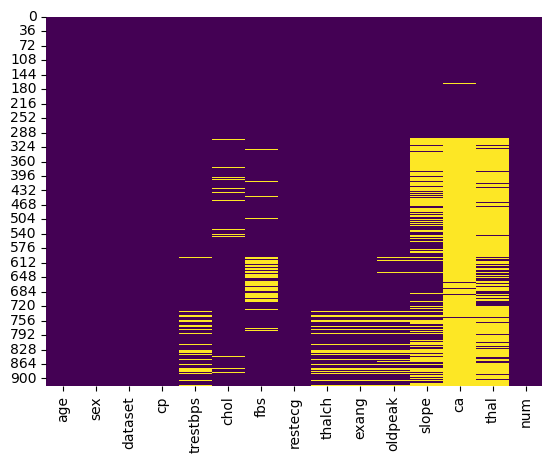

In [10]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

Heatmap interpretation:

- **Yellow Lines**: represent missing values for a particular feature in a given row. For example, we can observe a significant number of yellow lines under the ca column, indicating that this feature has a high proportion of missing values.
- **Purple Background:** representing non-missing values.
- **Analysis**:
    * Features like `ca`, `trestbps`, `chol`, `thalch` and `oldpeak` have visible missing values (yellow segments) in specific rows.
    * Features like `age`, `sex`, `cp`, and `num` have no yellow lines, indicating no missing values for those columns.
    
- **Patterns in Missingness**: If yellow lines cluster around specific rows or sections, it may indicate that missingness is not random and is influenced by factors such as other features or groups in the data. For instance, `thalch`, `trestbps`, `oldpeak` and `ca` have overlapping yellow lines, it could suggest that these features have related missingness patterns.


To explore whether features like `thalch`, `trestbps`, `oldpeak` and `ca` have related missingness patterns, we can examine how the missingness in one feature correlates with the missingness in others. Here’s how to approach this:


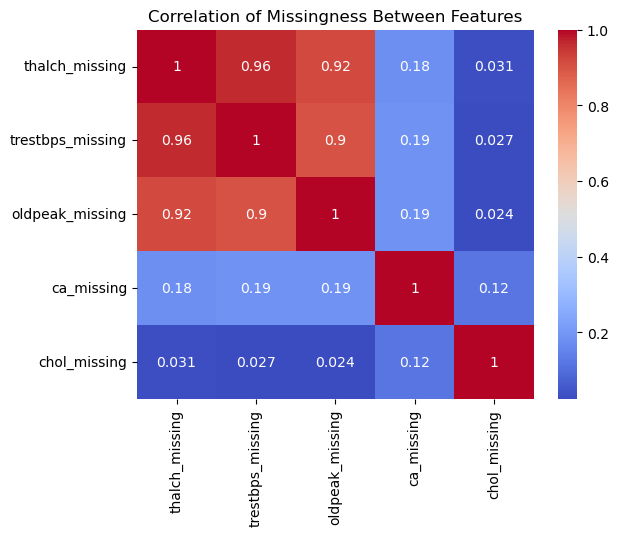

In [11]:
missing_cols = ['thalch', 'trestbps', 'oldpeak', 'ca', 'chol']
for col in missing_cols:
    df[f'{col}_missing'] = df[col].isnull().astype(int)

missingness_df = df[[f'{col}_missing' for col in missing_cols]]


# Compute correlations and heatmap
corr_matrix = missingness_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Missingness Between Features')
plt.show()

# Association test between features
contingency_table = pd.crosstab(df['thalch_missing'], df['ca_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

There is strong correlation between missing values in `thalch`, `trestbps` and `oldpeak`. Strong correlations (≥90%) between these features indicate that when one value is missing, the others are also likely to be missing. This suggests a shared mechanism causing the missingness. For instance:
- These features might be collected under similar conditions or depend on the same test/measurement. 
- There could be a systematic issue (e.g., incomplete patient records or tests not performed).


With `ca`, the correlation is weak due to this feature having a very large number of missing features.
The lack of strong correlation between missing `chol` values and the missingness of other features in the heatmap confirms that `chol` likely has a different missingness mechanism.
For example: Missing chol values might depend on different patient characteristics or operational factors (e.g., cholesterol tests were selectively performed).

In [12]:
if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in thalch and missingmess in ca")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in thalch and missingmess in ca")
    print("**\n")
    
contingency_table = pd.crosstab(df['thalch_missing'], df['trestbps_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)


if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in thalch and missingmess in trestbps")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in thalch and missingmess in trestbps")
    print("**\n")
    
contingency_table = pd.crosstab(df['thalch_missing'], df['oldpeak_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)


if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in thalch and missingmess in oldpeak")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in thalch and missingmess in oldpeak")
    print("**\n")

contingency_table = pd.crosstab(df['trestbps_missing'], df['oldpeak_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)


if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in trestbps and missingmess in oldpeak")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in trestbps and missingmess in oldpeak")
    print("**\n")

contingency_table = pd.crosstab(df['trestbps_missing'], df['ca_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in trestbps and missingmess in ca")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in trestbps and missingmess in ca")
    print("**\n")


contingency_table = pd.crosstab(df['oldpeak_missing'], df['ca_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in oldpeak and missingmess in ca")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in oldpeak and missingmess in ca")
    print("**\n")




contingency_table = pd.crosstab(df['oldpeak_missing'], df['chol_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in oldpeak and missingmess in chol")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in oldpeak and missingmess in chol")
    print("**\n")
    

contingency_table = pd.crosstab(df['ca_missing'], df['chol_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in ca and missingmess in chol")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in ca and missingmess in chol")
    print("**\n")
    
    
contingency_table = pd.crosstab(df['trestbps_missing'], df['chol_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in trestbps and missingmess in chol")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in trestbps and missingmess in chol")
    print("**\n")


contingency_table = pd.crosstab(df['thalch_missing'], df['chol_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between missingness in thalch and missingmess in chol")
    print("**\n")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between missingness in thalch and missingmess in chol")
    print("**\n")

Chi-square test p-value: 1.2107434336811199e-07
There is a statistically significant association between missingness in thalch and missingmess in ca
**

Chi-square test p-value: 4.5047640028363045e-184
There is a statistically significant association between missingness in thalch and missingmess in trestbps
**

Chi-square test p-value: 6.382538336292152e-168
There is a statistically significant association between missingness in thalch and missingmess in oldpeak
**

Chi-square test p-value: 5.511941852685263e-162
There is a statistically significant association between missingness in trestbps and missingmess in oldpeak
**

Chi-square test p-value: 3.712714441847903e-08
There is a statistically significant association between missingness in trestbps and missingmess in ca
**

Chi-square test p-value: 1.521415277197415e-08
There is a statistically significant association between missingness in oldpeak and missingmess in ca
**

Chi-square test p-value: 0.7232483338037239
There is not a sta

The weaker correlation between `ca` and other features (despite significant p-values) suggests a different missingness mechanism for ca. Its large number of missing values might dilute its relationship with others.
This indicates that while missing `ca` values sometimes overlap with missing `thalch`, `trestbps`, and `oldpeak`, the pattern is less consistent.


- Extremely low p-values (<0.05) confirm that the missingness in these features is not random and is significantly associated with one another.
- For example:
    * The missingness of thalch strongly predicts the missingness of ca, `trestbps`, and `oldpeak`.
    * Similarly, the missingness of `trestbps` and `oldpeak` are interrelated.


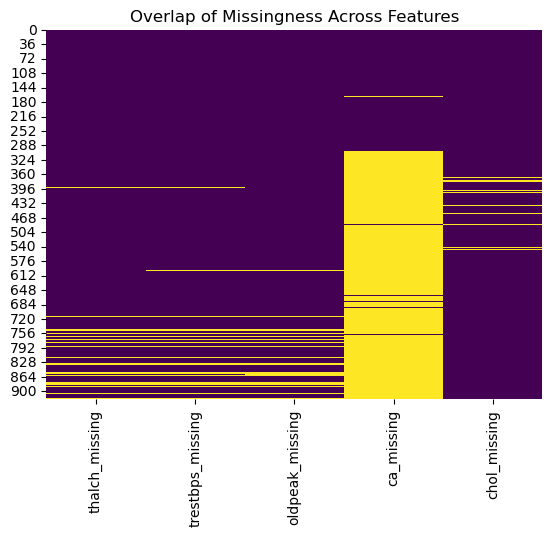

In [13]:
sns.heatmap(missingness_df, cbar=False, cmap='viridis')
plt.title('Overlap of Missingness Across Features')
plt.show()

**Possible Explanations for Patterns**:
- Data Collection Issues:
    * The measurements for thalch, trestbps, and oldpeak might come from the same medical test or procedure. If that procedure wasn’t performed (e.g., due to patient condition, refusal, or resource constraints), all these values could be missing.
- Missingness Mechanisms:
    * These patterns suggest the possibility of Missing Not At Random (MNAR):
        - Missingness depends on unobserved values themselves (e.g., patients with extreme values in these metrics might be excluded from testing or have incomplete records).
    * Alternatively, they could be Missing At Random (MAR):
        - Missingness depends on observed variables (e.g., age, sex, or dataset).
- Different Behavior for ca:
    * The weak correlation with ca missingness implies it might follow a different missingness mechanism or depend on unrelated external factors.

Let's explore potential causes of missingness:

Feature thalch: Maximum heart rate achieved during a stress test 


sex
0    0.010309
1    0.073003
Name: thalch_missing, dtype: float64

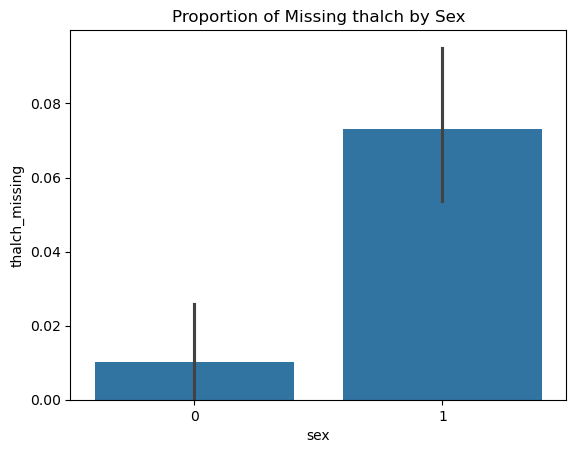

Chi-square test p-value: 0.00192593908057648
There is a statistically significant association between the variables sex and missingness in thalch (maximum heart rate achieved)


,count,mean,std,min,25%,50%,75%,max
thalch_missing,,,,,,,,
0,865.0,53.135260,9.392987,28.0,46.0,54.0,60.0,77.0
1,55.0,59.418182,7.887381,35.0,54.5,60.0,64.5,74.0


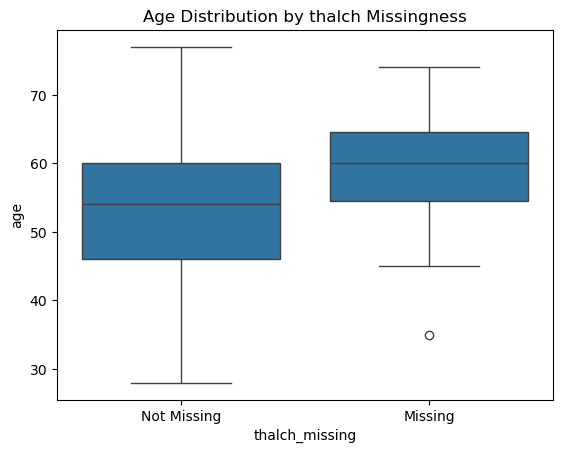

T-stat: 4.852361623815036
Chi-square test p-value: 1.4329769661964735e-06
There is a statistically significant association between the age and missingness in thalch (maximum heart rate achieved)


In [14]:
# Explore the relationship between missingness in a feature and other variables such age and sex
print("Feature thalch: Maximum heart rate achieved during a stress test ")

# Categorical feature (AGE)
# 1 Compare proportions
df['thalch_missing'] = df['thalch'].isnull().astype(int)
display(df.groupby('sex')['thalch_missing'].mean())

# 2. Plot
sns.barplot(data=df, x='sex', y='thalch_missing')
plt.title('Proportion of Missing thalch by Sex')
plt.show()

# 3. Test for statistical significance (as we find visual and numerical differences)
# Chi-square test of independence
contingency_table = pd.crosstab(df['sex'], df['thalch_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between the variables sex and missingness in thalch (maximum heart rate achieved)")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between the variables sex and missingness in thalch (maximum heart rate achieved)")

# Numerical feature (Age)

# 1. Compare distributions
display( df.groupby('thalch_missing')['age'].describe())

# 2. Plot
sns.boxplot(data=df, x='thalch_missing', y='age')
plt.title('Age Distribution by thalch Missingness')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()

# 3. Test for statistical significance (t-test / Mann-Whitney U test)
missing = df[df['thalch_missing'] == 1]['age']
not_missing = df[df['thalch_missing'] == 0]['age']

t_stat, p_value = ttest_ind(missing, not_missing, nan_policy='omit')
print(f"T-stat: {t_stat}")

if p_value<0.05:
    print(f"Chi-square test p-value: {p_value}")
    print("There is a statistically significant association between the age and missingness in thalch (maximum heart rate achieved)")
else:
    print(f"Chi-square test p-value: {p_value}")
    print("There is not a statistically significant association between the age and missingness in thalch (maximum heart rate achieved)")


**Results**

We can se that male patients have higer likelihood of missing `thalch` values. Also, older patients are more likely to have missing values for this feature.
Note that:
- If there's no significant relationship, the missingness might be MCAR.
- If the missingness correlates with observed variables (e.g., age or sex), it’s likely MAR.

Results:
- Not MCAR: Missingness in `thalch` is not Missing Completely at Random (MCAR), as it depends on `age` and `sex` (from earlier tests).
- Likely MAR: The data is likely Missing at Random (MAR) if the missingness of `thalch` is fully explained by `age` and/or other observed variables like `sex`.


In MAR, the missingness of a variable depends only on other observed variables (like age in this case) but not on the value of the missing variable itself (trestbps).

Feature trestbps: Reesting blood pressure
Feature thalch: Maximum heart rate achieved during a stress test 


sex
0    0.010309
1    0.078512
Name: trestbps_missing, dtype: float64

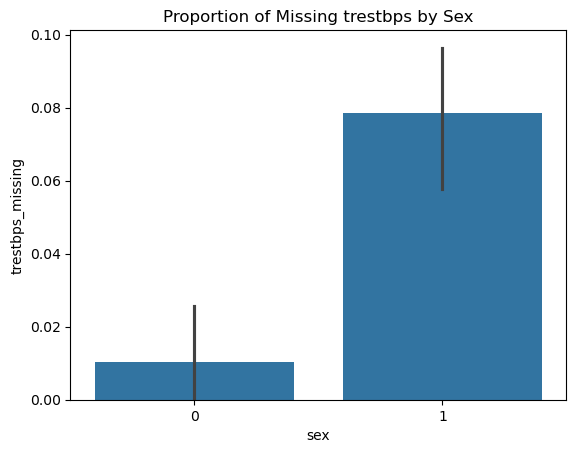

Chi-square test p-value: 0.0010393356296910959
There is a statistically significant association between the variables sex and missingness in trestbps (Reesting blood pressure)


,count,mean,std,min,25%,50%,75%,max
trestbps_missing,,,,,,,,
0,861.0,53.130081,9.383647,28.0,46.0,54.0,60.0,77.0
1,59.0,59.067797,8.260551,35.0,54.5,60.0,64.0,74.0


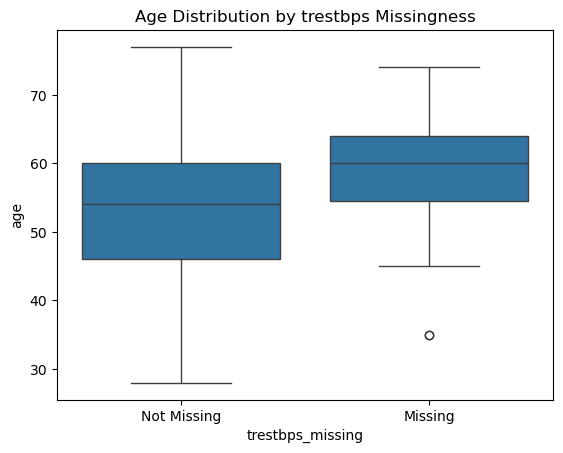

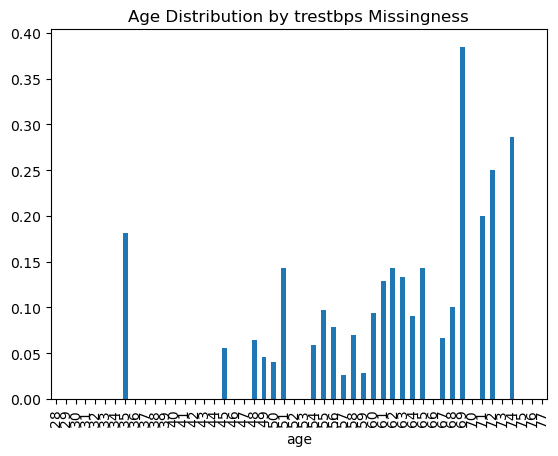

T-stat: 4.735775495171445
Chi-square test p-value: 2.5268880632125463e-06
There is a statistically significant association between the age and missingness in trestbps (Reesting blood pressure)


In [15]:
print("Feature trestbps: Reesting blood pressure")


# Explore the relationship between missingness in a feature and other variables such age and sex
print("Feature thalch: Maximum heart rate achieved during a stress test ")

# Categorical feature (AGE)
# 1 Compare proportions
df['trestbps_missing'] = df['trestbps'].isnull().astype(int)
display(df.groupby('sex')['trestbps_missing'].mean())

# 2. Plot
sns.barplot(data=df, x='sex', y='trestbps_missing')
plt.title('Proportion of Missing trestbps by Sex')
plt.show()

# 3. Test for statistical significance (as we find visual and numerical differences)
# Chi-square test of independence
contingency_table = pd.crosstab(df['sex'], df['trestbps_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between the variables sex and missingness in trestbps (Reesting blood pressure)")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between the variables sex and missingness in trestbps (Reesting blood pressure)")

# Numerical feature (Age)

# 1. Compare distributions
display( df.groupby('trestbps_missing')['age'].describe())

# 2. Plot
sns.boxplot(data=df, x='trestbps_missing', y='age')
plt.title('Age Distribution by trestbps Missingness')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()


df.groupby('age')['trestbps_missing'].mean().plot(kind='bar')
plt.title('Age Distribution by trestbps Missingness')
plt.show()

# 3. Test for statistical significance (t-test / Mann-Whitney U test)
missing = df[df['trestbps_missing'] == 1]['age']
not_missing = df[df['trestbps_missing'] == 0]['age']

t_stat, p_value = ttest_ind(missing, not_missing, nan_policy='omit')
print(f"T-stat: {t_stat}")

if p_value<0.05:
    print(f"Chi-square test p-value: {p_value}")
    print("There is a statistically significant association between the age and missingness in trestbps (Reesting blood pressure)")
else:
    print(f"Chi-square test p-value: {p_value}")
    print("There is not a statistically significant association between the age and missingness in trestbps (Reesting blood pressure)")


Older patients are more likely to have missing values for this `trestbps`.

**Results**

We can se that male patients have higer likelihood of missing reesting blood pressure `trestbps` values. Also, older patients are more likely to have missing values for this feature.
Note that:
- If there's no significant relationship, the missingness might be MCAR.
- If the missingness correlates with observed variables (e.g., age or sex), it’s likely MAR.

- Results:
    * Not MCAR: Missingness in `trestbps` is not Missing Completely at Random (MCAR), as it depends on `age` and `sex` (from earlier tests).
    * Likely MAR: The data is likely Missing at Random (MAR) if the missingness of `trestbps` is fully explained by `age` and/or other observed variables like `sex`.


In MAR, the missingness of a variable depends only on other observed variables (like age in this case) but not on the value of the missing variable itself (trestbps).
For example, older patients may be less likely to have their resting blood pressure recorded due to protocol, accessibility, or other logistical reasons.

Feature oldpeak: ST depression induced by exercise relative to rest


sex
0    0.005155
1    0.084022
Name: oldpeak_missing, dtype: float64

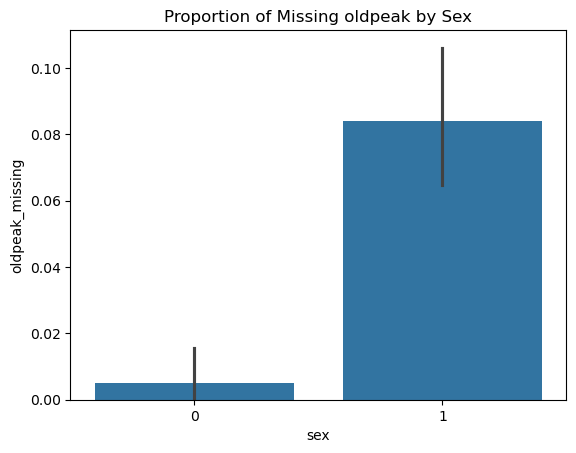

Chi-square test p-value: 0.00019053889368890177
There is a statistically significant association between the variables sex and missingness in oldpeak


,count,mean,std,min,25%,50%,75%,max
oldpeak_missing,,,,,,,,
0,858.0,53.129371,9.375646,28.0,46.0,54.0,60.00,77.0
1,62.0,58.790323,8.535629,35.0,54.0,60.0,64.75,74.0


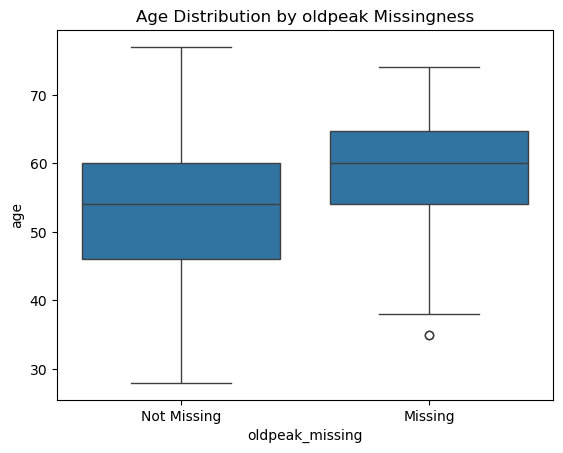

T-stat: 4.617615507296269
Chi-square test p-value: 4.4348687881429025e-06
There is a statistically significant association between the age and missingness in oldpeak


In [16]:
# Explore the relationship between missingness in a feature and other variables such age and sex
print("Feature oldpeak: ST depression induced by exercise relative to rest")

# Categorical feature (AGE)
# 1 Compare proportions
df['oldpeak_missing'] = df['oldpeak'].isnull().astype(int)
display(df.groupby('sex')['oldpeak_missing'].mean())

# 2. Plot
sns.barplot(data=df, x='sex', y='oldpeak_missing')
plt.title('Proportion of Missing oldpeak by Sex')
plt.show()

# 3. Test for statistical significance (as we find visual and numerical differences)
# Chi-square test of independence
contingency_table = pd.crosstab(df['sex'], df['oldpeak_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between the variables sex and missingness in oldpeak")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between the variables sex and missingness in oldpeak")

# Numerical feature (Age)

# 1. Compare distributions
display( df.groupby('oldpeak_missing')['age'].describe())

# 2. Plot
sns.boxplot(data=df, x='oldpeak_missing', y='age')
plt.title('Age Distribution by oldpeak Missingness')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()

# 3. Test for statistical significance (t-test / Mann-Whitney U test)
missing = df[df['oldpeak_missing'] == 1]['age']
not_missing = df[df['oldpeak_missing'] == 0]['age']

t_stat, p_value = ttest_ind(missing, not_missing, nan_policy='omit')
print(f"T-stat: {t_stat}")

if p_value<0.05:
    print(f"Chi-square test p-value: {p_value}")
    print("There is a statistically significant association between the age and missingness in oldpeak")
else:
    print(f"Chi-square test p-value: {p_value}")
    print("There is not a statistically significant association between the age and missingness in oldpeak")


**Results**

We can se that male patients have higer likelihood of missing `oldpeak` values. Also, older patients are more likely to have missing values for this feature.
Note that:
- If there's no significant relationship, the missingness might be MCAR.
- If the missingness correlates with observed variables (e.g., age or sex), it’s likely MAR.

Observed:
- **Not MCAR**: Missingness in `oldpeak` is not Missing Completely at Random (MCAR), as it depends on `age` and `sex` (from earlier tests).
- **Likely MAR**: The data is likely Missing at Random (MAR) if the missingness of `oldpeak` is fully explained by `age` and/or other observed variables like `sex`.

In MAR, the missingness of a variable depends only on other observed variables (like age in this case) but not on the value of the missing variable itself (oldpeak).

Feature chol: Serum cholesterol level (in mg/dl)
Feature thalch: Maximum heart rate achieved during a stress test 


sex
0    0.036082
1    0.031680
Name: chol_missing, dtype: float64

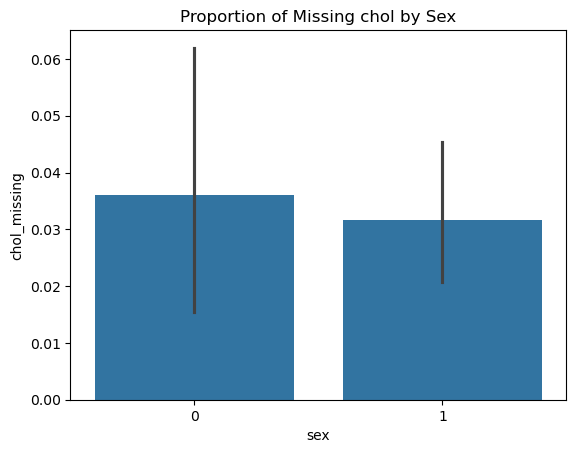

Chi-square test p-value: 0.9369222760155522
There is not a statistically significant association between the variables sex and missingness in chol (Serum Cholesterol level)


,count,mean,std,min,25%,50%,75%,max
chol_missing,,,,,,,,
0,890.0,53.580899,9.389502,28.0,47.0,54.0,60.00,77.0
1,30.0,51.433333,10.371324,29.0,45.5,50.0,55.75,76.0


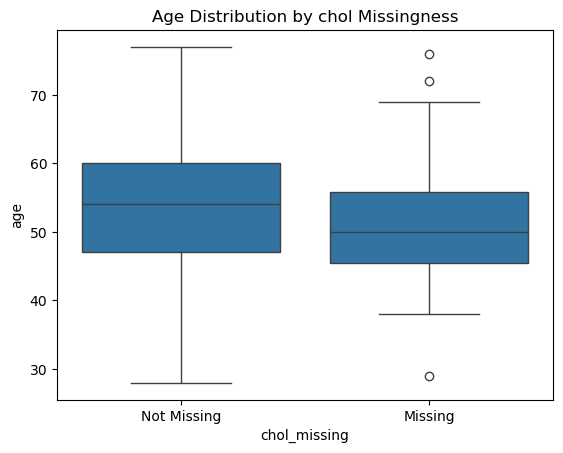

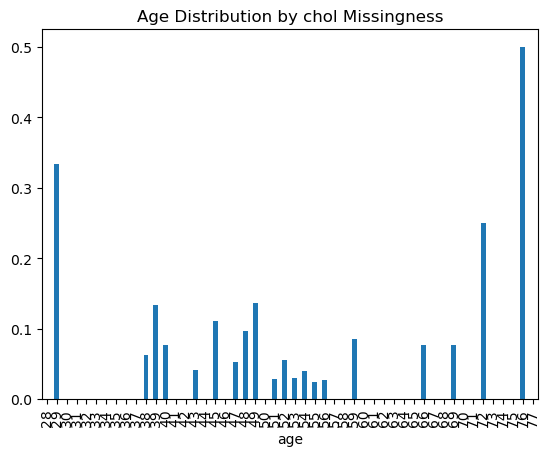

T-stat: -1.227894987541956
Chi-square test p-value: 0.21980113218446976
There is not a statistically significant association between the age and missingness in chol (Serum cholesterol level)


In [17]:
print("Feature chol: Serum cholesterol level (in mg/dl)")


# Explore the relationship between missingness in a feature and other variables such age and sex
print("Feature thalch: Maximum heart rate achieved during a stress test ")

# Categorical feature (AGE)
# 1 Compare proportions
df['chol_missing'] = df['chol'].isnull().astype(int)
display(df.groupby('sex')['chol_missing'].mean())

# 2. Plot
sns.barplot(data=df, x='sex', y='chol_missing')
plt.title('Proportion of Missing chol by Sex')
plt.show()

# 3. Test for statistical significance (as we find visual and numerical differences)
# Chi-square test of independence
contingency_table = pd.crosstab(df['sex'], df['chol_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p<0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between the variables sex and missingness in chol (Serum cholesterol level)")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between the variables sex and missingness in chol (Serum Cholesterol level)")

# Numerical feature (Age)

# 1. Compare distributions
display( df.groupby('chol_missing')['age'].describe())

# 2. Plot
sns.boxplot(data=df, x='chol_missing', y='age')
plt.title('Age Distribution by chol Missingness')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()


df.groupby('age')['chol_missing'].mean().plot(kind='bar')
plt.title('Age Distribution by chol Missingness')
plt.show()

# 3. Test for statistical significance (t-test / Mann-Whitney U test)
missing = df[df['chol_missing'] == 1]['age']
not_missing = df[df['chol_missing'] == 0]['age']

t_stat, p_value = ttest_ind(missing, not_missing, nan_policy='omit')
print(f"T-stat: {t_stat}")

if p_value<0.05:
    print(f"Chi-square test p-value: {p_value}")
    print("There is a statistically significant association between the age and missingness in chol (Serum cholesterol level)")
else:
    print(f"Chi-square test p-value: {p_value}")
    print("There is not a statistically significant association between the age and missingness in chol (Serum cholesterol level)")

In [18]:
df['chol_missing'] = df['chol'].isnull().astype(int)

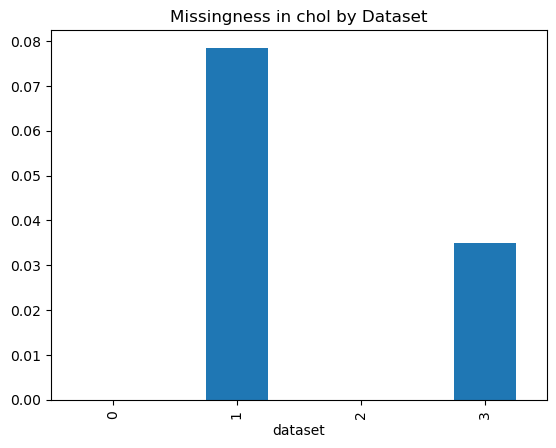

In [19]:
df.groupby('dataset')['chol_missing'].mean().plot(kind='bar', title='Missingness in chol by Dataset')
plt.show()

**Dataset**. Based on these observations, the missingness in chol seems to follow a structured pattern rather than being random

- **Observation**: There is ignificant association with `chol_missing`. `Chol` has missing values exclusively in datasets *Hungary* and *VA Long Beach*, with no missing values in datasets *Cleveland* and *Switzerland*.
- **Interpretation**: This strongly indicates that missingness is tied to the data collection process or methodology in `datasets`  *Hungary* and *VA Long Beach*. Differences in data recording standards, equipment availability, or focus areas for these datasets could explain this phenomenon.


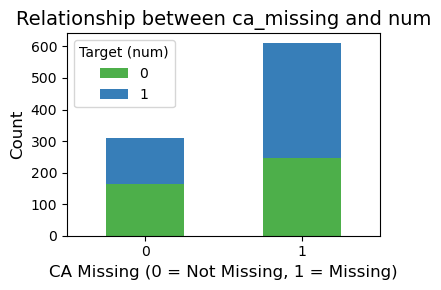

There is a significant relationship between 'ca_missing' and 'num'.
p-value: 0.0002032458709837679

Chi-squared statistic: 13.800835082967458


In [20]:
# Create 'ca_missing' binary column (1 for missing, 0 for not missing)
df['ca_missing'] = df['ca'].isnull().astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df['ca_missing'], df['num'])

# Plot the contingency table as a stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(4, 3), color=['#4daf4a', '#377eb8', '#e41a1c', '#ff7f00'])
plt.title('Relationship between ca_missing and num', fontsize=14)
plt.xlabel('CA Missing (0 = Not Missing, 1 = Missing)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target (num)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant relationship between 'ca_missing' and 'num'.")
    print("p-value:", p)
    print("\nChi-squared statistic:", chi2)
else:
    print("There is no significant relationship between 'ca_missing' and 'num'.")
    print("p-value:", p)
    print("\nChi-squared statistic:", chi2)



- The chi-squared test yielded a **very low p-value (<0.05)**, indicating a **statistically significant relationship** between the missingness in `ca` and the target variable `num`.
- This suggests that the missingness in `ca` is related to the outcome, which is characteristic of **MNAR (Missing Not At Random)**.


,count,mean,std,min,25%,50%,75%,max
ca_missing,,,,,,,,
0,309.0,54.647249,8.971917,29.0,48.0,56.0,61.0,77.0
1,611.0,52.936170,9.601615,28.0,47.0,54.0,60.0,77.0


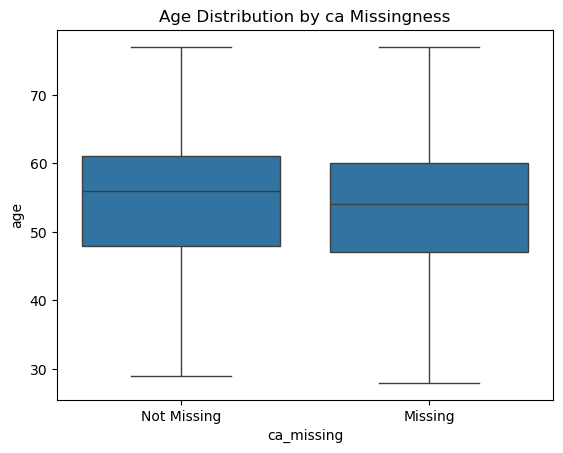

T-stat: -2.609017096247809
T-test p-value: 0.009227961281308459
There is a statistically significant association between `age` and missingness in `ca` (Serum cholesterol level).


sex
0    0.500000
1    0.707989
Name: ca_missing, dtype: float64

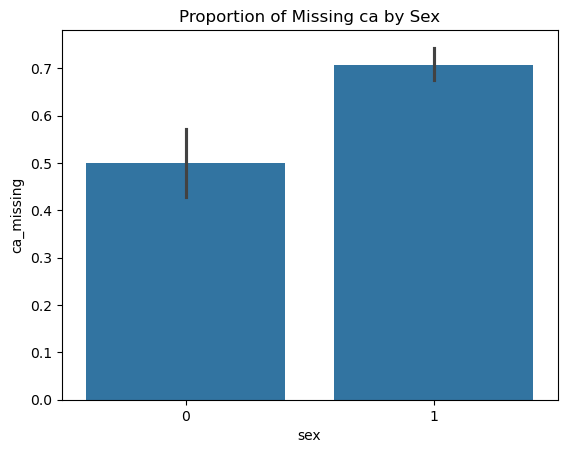

Chi-square test p-value: 8.172799118657291e-08
There is a statistically significant association between `sex` and missingness in `ca` (Serum cholesterol level).


dataset
0    0.016447
1    0.989761
2    0.959350
3    0.990000
Name: ca_missing, dtype: float64

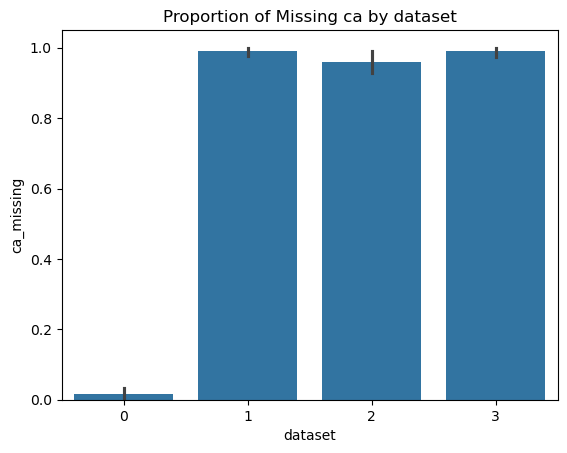

Chi-square test p-value: 7.375619607675134e-185
There is a statistically significant association between `dataset` and missingness in `ca` (Serum cholesterol level).


In [21]:
# Compare distributions of `age` by missingness in `ca`
display(df.groupby('ca_missing')['age'].describe())

# Plot age distribution by missingness
sns.boxplot(data=df, x='ca_missing', y='age')
plt.title('Age Distribution by ca Missingness')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()


# Perform t-test for `age` and missingness in `chol`
missing = df[df['ca_missing'] == 1]['age']
not_missing = df[df['ca_missing'] == 0]['age']

t_stat, p_value = ttest_ind(missing, not_missing, nan_policy='omit')
print(f"T-stat: {t_stat}")

if p_value < 0.05:
    print(f"T-test p-value: {p_value}")
    print("There is a statistically significant association between `age` and missingness in `ca` (Serum cholesterol level).")
else:
    print(f"T-test p-value: {p_value}")
    print("There is not a statistically significant association between `age` and missingness in `ca`.")


# Sex
# Compare proportions of missingness in `chol` by `sex`
display(df.groupby('sex')['ca_missing'].mean())

# Plot proportions of missingness by `sex`
sns.barplot(data=df, x='sex', y='ca_missing')
plt.title('Proportion of Missing ca by Sex')
plt.show()

# Chi-square test of independence
contingency_table = pd.crosstab(df['sex'], df['ca_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p < 0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between `sex` and missingness in `ca` (Serum cholesterol level).")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between `sex` and missingness in `ca`.")


# Dataset
# Compare proportions of missingness in `chol` by `dataset`
display(df.groupby('dataset')['ca_missing'].mean())

# Plot proportions of missingness by `sex`
sns.barplot(data=df, x='dataset', y='ca_missing')
plt.title('Proportion of Missing ca by dataset')
plt.show()

# Chi-square test of independence
contingency_table = pd.crosstab(df['dataset'], df['ca_missing'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p < 0.05:
    print(f"Chi-square test p-value: {p}")
    print("There is a statistically significant association between `dataset` and missingness in `ca` (Serum cholesterol level).")
else:
    print(f"Chi-square test p-value: {p}")
    print("There is not a statistically significant association between `dataset` and missingness in `ca`.")


We can see that male patients have a higher likelihood of missing `ca` values. Additionally, younger patients are more likely to have missing values for this feature.

* **Key Observations**:
    - **If there's no significant relationship** between missingness and other variables, the missingness might be MCAR (Missing Completely at Random).
    - **If the missingness correlates with observed variables** (such as age or sex), it’s likely to be MAR (Missing at Random).

* **Observations**:
    - **Not MCAR**: Missingness in `ca` is **not** Missing Completely at Random (MCAR), as it depends on `age` and `sex` (based on earlier tests).
    - **Likely MAR**: The data is likely Missing at Random (MAR) if the missingness of `ca` is fully explained by `age` and/or other observed variables like `sex` or `dataset`.

* **Conclusion**: In the case of MAR, the missingness of a variable (such as `ca`) depends only on other observed variables (like `age` in this case) but **not on the value of the missing variable itself** (i.e., the actual `ca` value).


## To do

Explore missinges in categorical features

While the overall proportion of missing values in the dataset offers some insights, it is insufficient for a comprehensive analysis. A valuable tool for examining missing data is **Missingno**. This library provides a flexible and user-friendly toolkit for generating quick visual summaries of missing data patterns. You can find more information on [Missingno's GitHub page](https://github.com/ResidentMario/missingno).


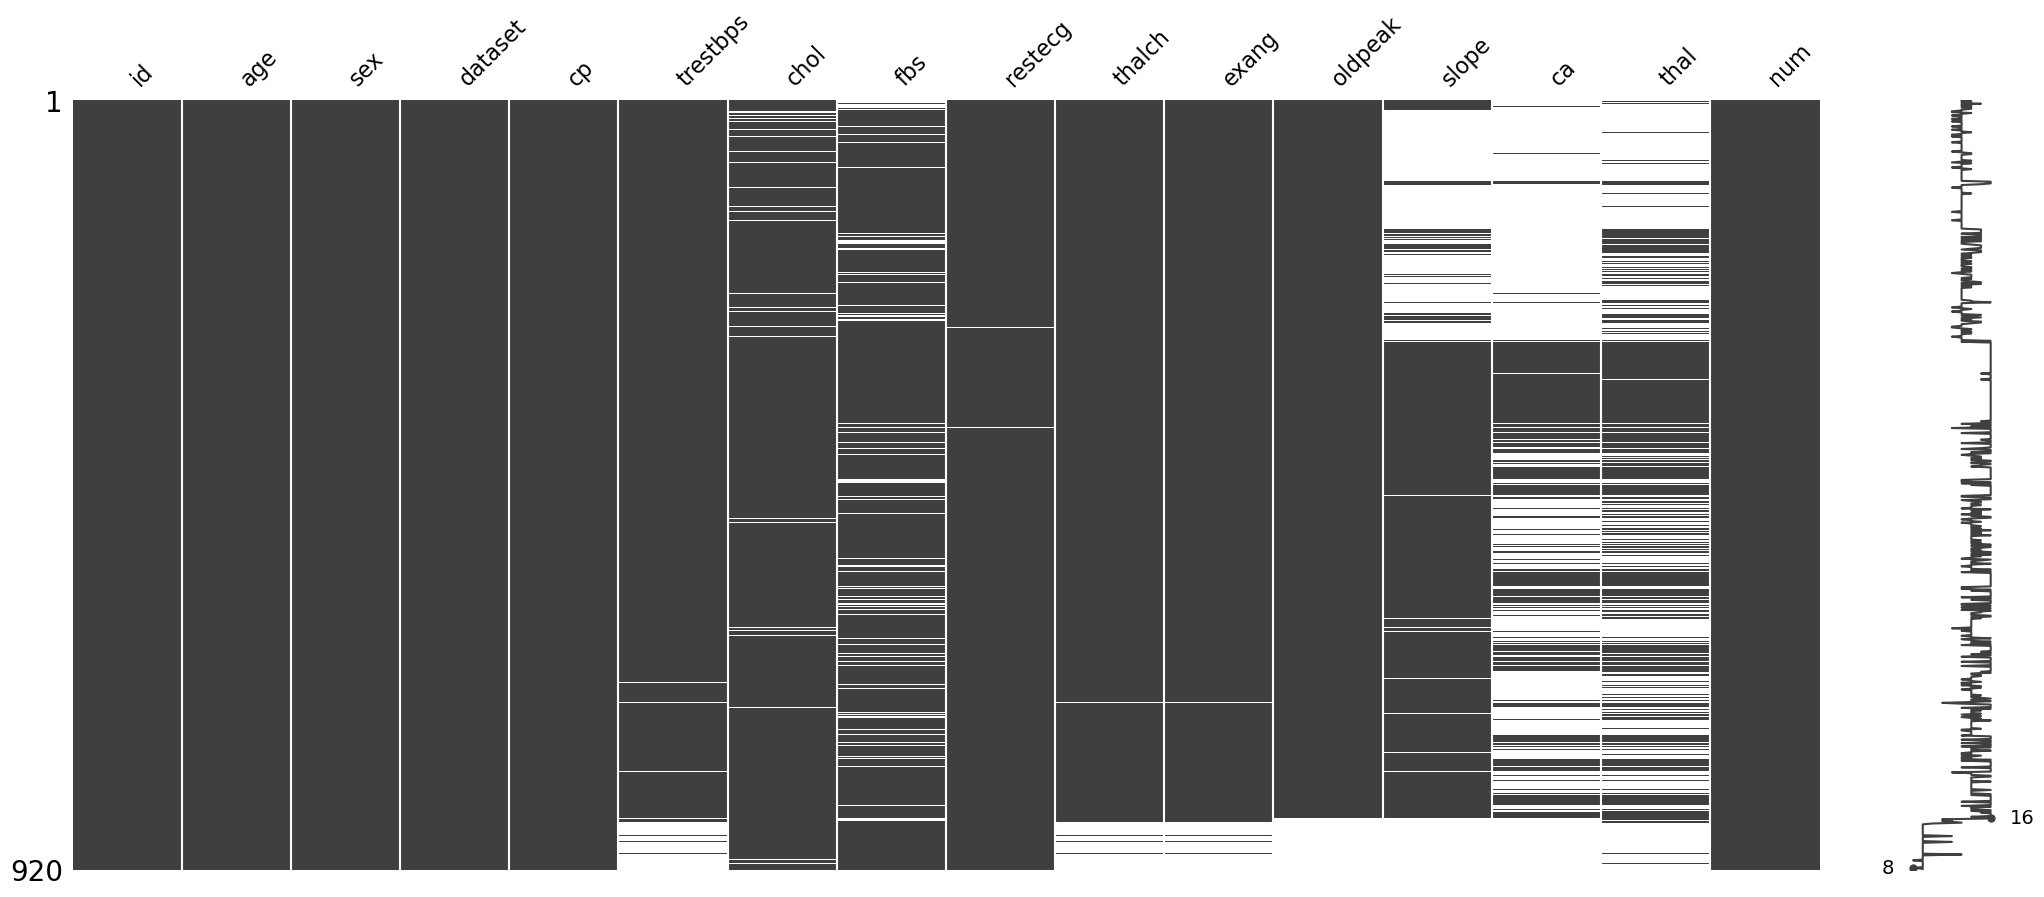

In [22]:
sorted = read_pre_process_data()[0].sort_values('oldpeak')
msno.matrix(sorted)

plt.show()

At a glance, age, sec, dataset, cp or num appear to be completely populated, while serum cholesterol level seems mostly complete, but spottier. Features such as number of major vessels, ST Depression, Resting Blood Pressure and Maximum Heart Rate present a higer percentage of missing values.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

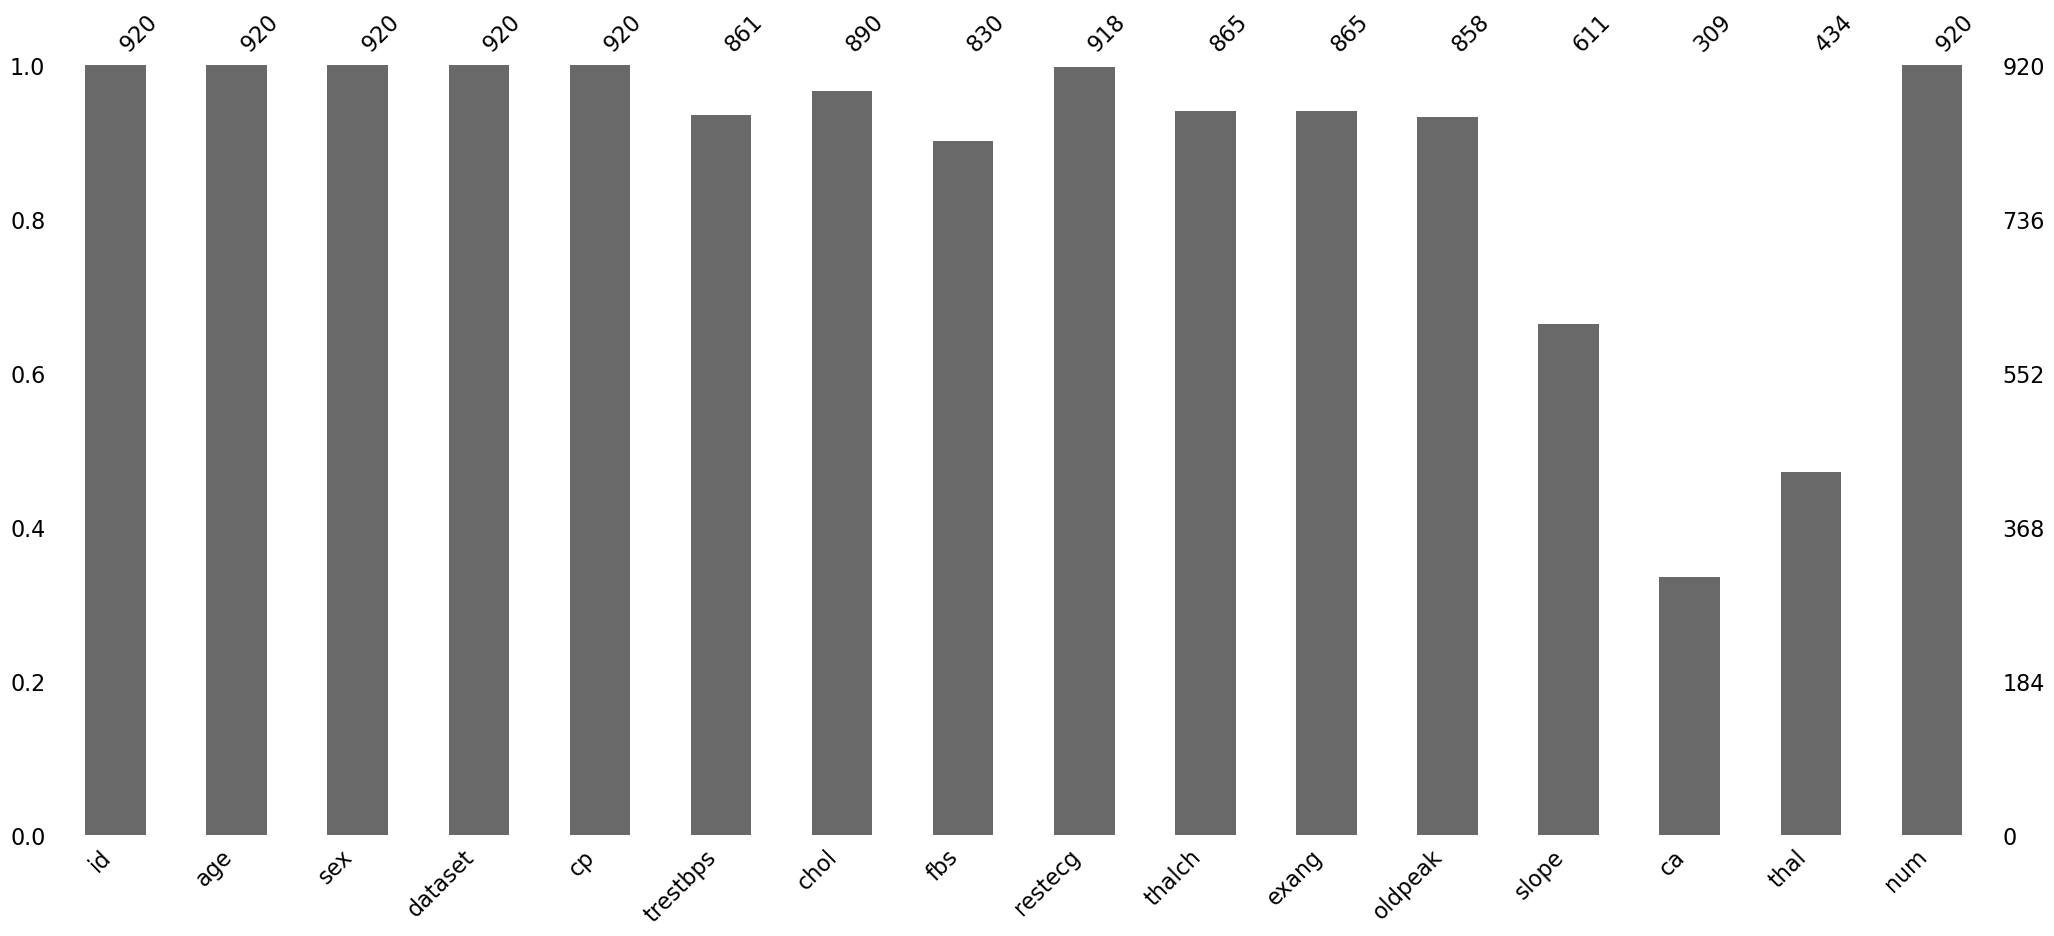

In [23]:
msno.bar(read_pre_process_data()[0])
plt.show()

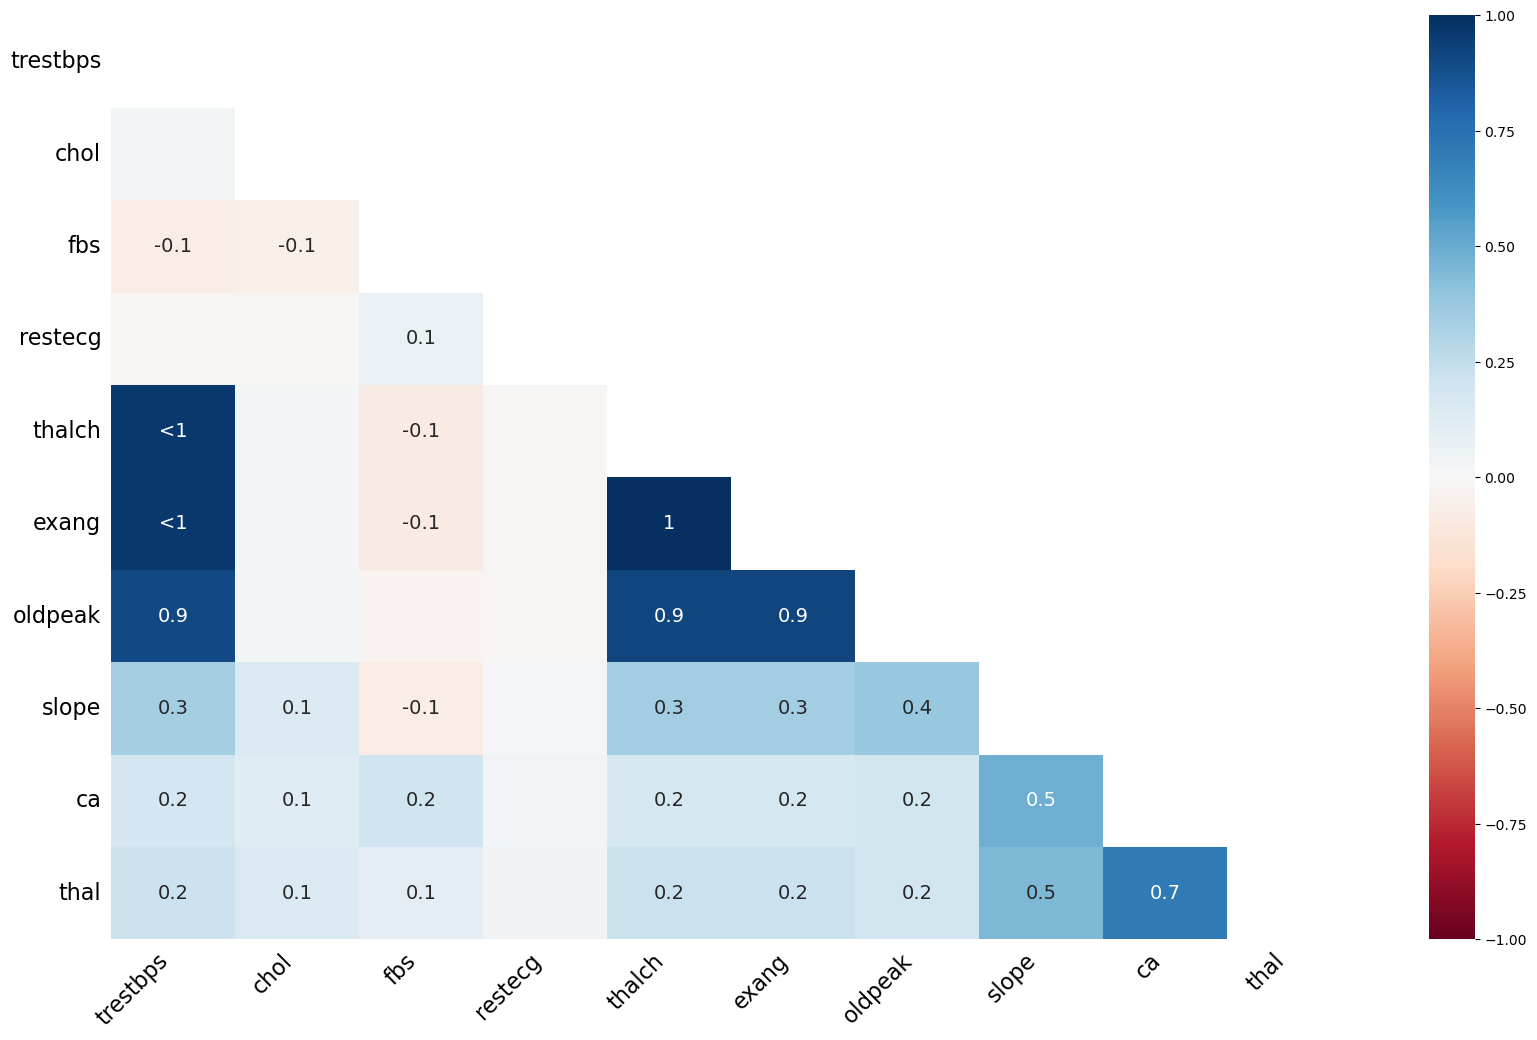

In [24]:
msno.heatmap(read_pre_process_data()[0])
plt.show()

In this dataset, 'trestbps', 'thalch' and 'oldpeak' variables are highly correlated with each other. The reason behind this should be investigated, and we should take this into account when dealing with missing values.

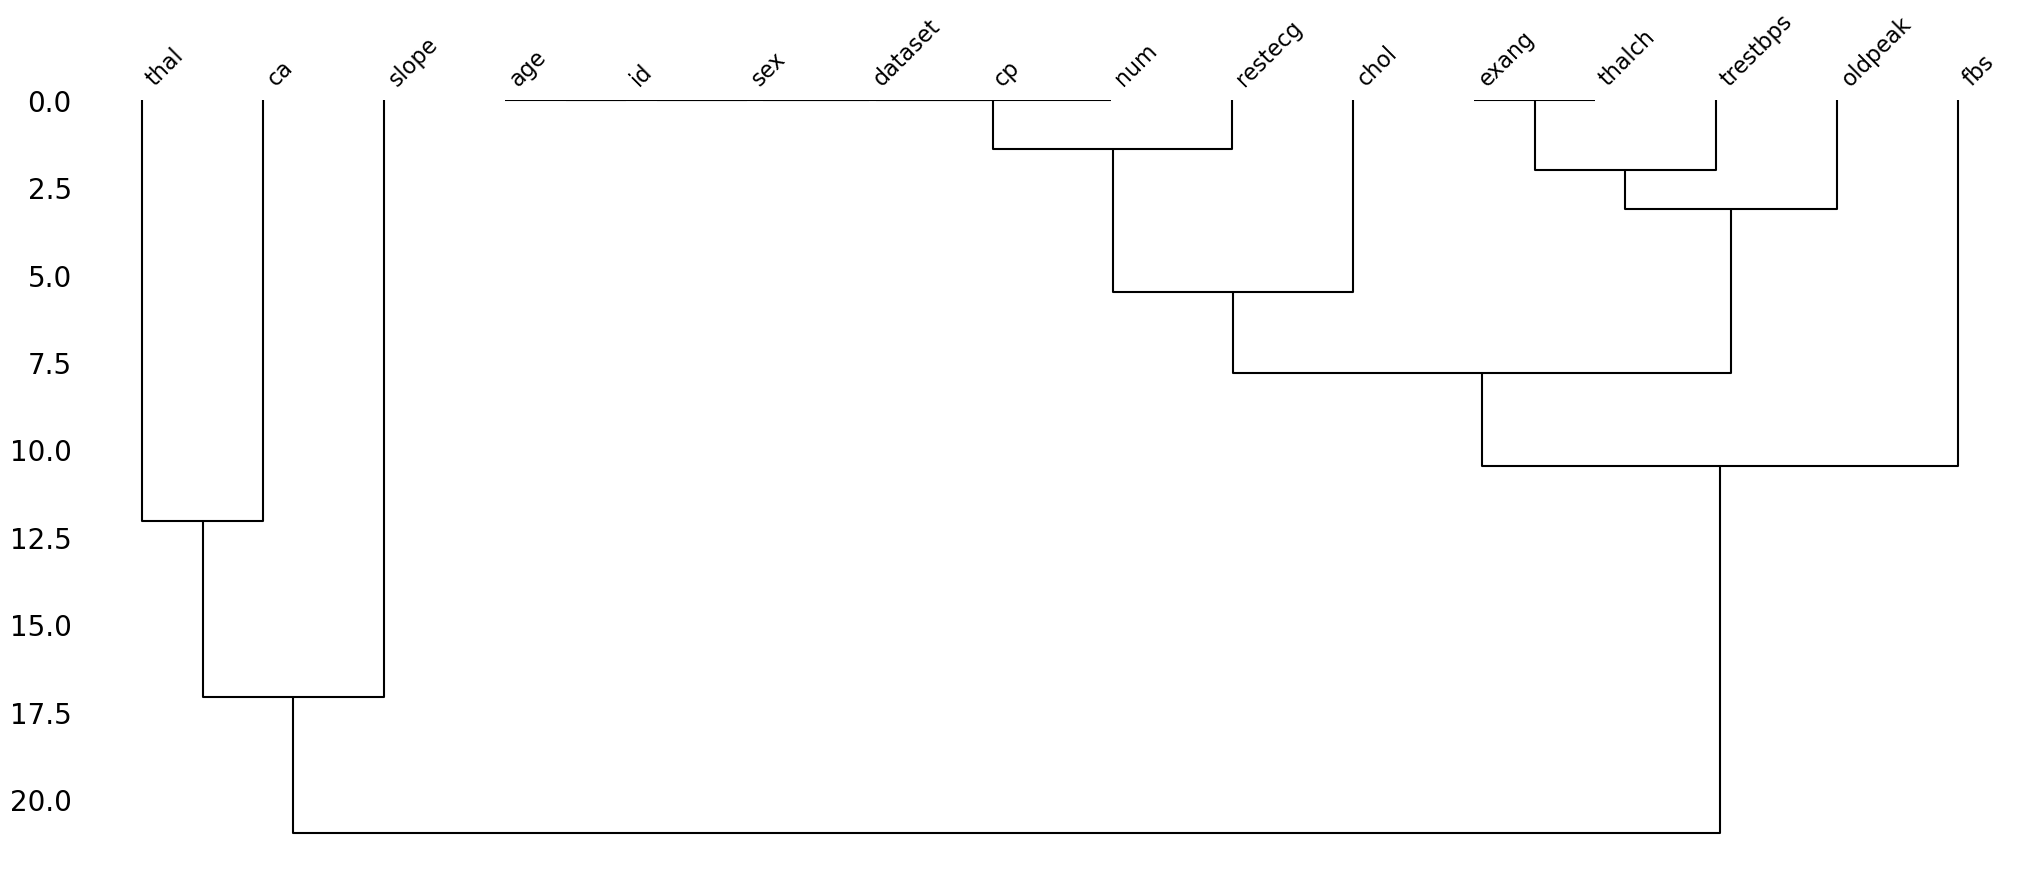

In [25]:
msno.dendrogram(read_pre_process_data()[0])

plt.show()

*"The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero."*

This tree diagram groups variables with high correlation together. The variables at position 0 are not correlated with the missing variables. As I observed in the heatmap, the variables 'thalch', 'trestbps' and 'oldpeak' are highly correlated with each other. At the same time, these 3 variables are more correlated with 'thal' and 'chol' than 'ca'.

# 5. Handling Missing Data - Methodology <a class="anchor"  id="chapter5"></a>

There are various assignment methods available for handling missing data, which depend on whether the data is missing at random, the proportion of missing values, and the specific machine learning model we intend to use. Appropriately addressing missing data is crucial; while some algorithms can accommodate missing values, most require a cleaned and edited dataset.

In this study, each method was applied to the dataset, and the Random Forest Classifier model was trained using the modified datasets. The accuracy of each method is presented and compared in the conclusion.

The most commonly used methods for dealing with missing data are:
* Remove missing data by row or column
* Filling in missing data statistically (mean, median, ...)
* Filling missing data with other methods (moving averages)
* Using algorithms like XGBoost to ignore missing data
* Prediction of missing values

In [26]:
# To compare the success of the methods
accuracies = {}

## 5.1. Approach 1: Baseline Model with Unprocessed Missing Data <a class="anchor"  id="subsection1"></a>

Most popular models (SVM, NN…) cannot work with missing data. However, there are a few predictive models that can handle missing data internally. In this step, we will train a model using XGBoost without handling missing values in the raw dataset.

This approach serves as a baseline for comparison against subsequent methods that address missing data through imputation or other techniques. It allows us to gauge the impact of missing data handling on model performance.

In [27]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               920 non-null    int64  
 1   sex               920 non-null    int64  
 2   dataset           920 non-null    int64  
 3   cp                920 non-null    int64  
 4   trestbps          861 non-null    float64
 5   chol              890 non-null    float64
 6   fbs               830 non-null    float64
 7   restecg           918 non-null    float64
 8   thalch            865 non-null    float64
 9   exang             865 non-null    float64
 10  oldpeak           858 non-null    float64
 11  slope             611 non-null    float64
 12  ca                309 non-null    float64
 13  thal              434 non-null    float64
 14  num               920 non-null    int64  
 15  thalch_missing    920 non-null    int64  
 16  trestbps_missing  920 non-null    int64  
 1

In [28]:
df = read_pre_process_data()[1]

X_train, X_test, y_train, y_test = split_dataset(df)
print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')

train_distribution = pd.Series(y_train).value_counts(normalize=True) * 100
test_distribution = pd.Series(y_test).value_counts(normalize=True) * 100

class_comparison = pd.DataFrame({
    'Train %': train_distribution,
    'Test %': test_distribution
}).fillna(0)

# Print the class comparison
print(class_comparison)

accuracy_approach_1 = train_model_XGBoost(X_train, X_test, y_train, y_test)
accuracies['No Handling'] = accuracy_approach_1

Size of the Train dataset: 736
Size of the Test dataset: 184
       Train %    Test %
num                     
1    54.347826  59.23913
0    45.652174  40.76087
Accuracy: 0.875



**Advantages:**

- **Simplicity**: This approach is straightforward and requires no additional data preprocessing steps.
- **Preservation of Original Data**: By not altering the dataset, we retain all available information, which can be beneficial if missing values are randomly distributed and do not bias the results significantly.
- **Direct Handling by Some Algorithms**: Certain machine learning algorithms, particularly tree-based methods, can inherently accommodate missing values without significant degradation in performance. These algorithms are often robust to missing data, allowing them to make effective predictions even when some inputs are absent.


**Disadvantages:**

- **Model Limitations**: Most machine learning algorithms cannot handle missing values directly, leading to potential errors or inability to train effectively.
- **Potential Bias**: Ignoring missing data may introduce bias and reduce the reliability of predictions if the missingness is related to the target variable or if it is not missing at random (NMAR).
- **Reduced Data Utility**: The presence of missing values can limit the amount of usable data, which, even with an algorithm's robustness to missing values, may still adversely affect the model's performance and accuracy.

## 5.2. Approach 2: Deletion <a class="anchor"  id="subsection2"></a>

If the chosen models do not accommodate missing data, it is essential to remove the missing values from the dataset.

In this approach all entries with missing values are removed/discarded when doing analysis. Deletion is considered the simplest approach as there is no need to try and estimate value. However, the authors of Little and Rubin [Little RJ, Rubin DB](https://books.google.es/books?hl=es&lr=&id=BemMDwAAQBAJ&oi=fnd&pg=PR11&ots=FCAX6YFZ_Z&sig=HbQ3BH4xpuFUb-PcS3aZHjzQ88w&redir_esc=y#v=onepage&q&f=false) have demonstrated some of the weakness of deletion, as it introduce bias in analysis, especially when the missing data is not randomly distributed. The process of deletion can be carried out in two ways, pairwise or list-wise deletion [McKnight PE, McKnight KM, Sidani S, Figueredo AJ](https://books.google.es/books?hl=es&lr=&id=Oel21pwDWXQC&oi=fnd&pg=PA1&ots=ZyQGsV1eXb&sig=mebrnHc7ZzA8N_f2eX3S2qZLtJ8&redir_esc=y#v=onepage&q&f=false).

However, before employing these strategies, it is crucial to carefully consider several aspects of the data, including the size of the dataset after missing data removal, the randomness of the missing values, and the ratio of missing data to the overall dataset.


This category consists of three key stages:

- Pairwise Deletions
- Listwise Deletions
- Dropping Entire Columns


### 5.2.1. Listwise Deletions

In this approach, every case (row/sample) that has at least one missing value is removed/discarded of the analysis. This method is typically used when the proportion of missing data is significant or when the missing values follow a specific pattern.

In [29]:
df = read_pre_process_data()[1]

# 2. Listwise Deletions
# Drop rows with missing values in specific columns
df_listwise = df.dropna(subset=df.isna().sum().index.tolist())

In [30]:
X_train, X_test, y_train, y_test = split_dataset(df_listwise)
print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')

Size of the Train dataset: 239
Size of the Test dataset: 60


In [31]:
X_train.head(5)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
6,62,0,0,0,140.0,268.0,0.0,0.0,160.0,0.0,3.6,0.0,2.0,1.0
185,63,0,0,1,140.0,195.0,0.0,1.0,179.0,0.0,0.0,2.0,2.0,1.0
187,66,1,0,1,160.0,246.0,0.0,1.0,120.0,1.0,0.0,1.0,3.0,0.0
147,41,1,0,2,112.0,250.0,0.0,1.0,179.0,0.0,0.0,2.0,0.0,1.0
30,69,0,0,3,140.0,239.0,0.0,1.0,151.0,0.0,1.8,2.0,2.0,1.0


In [32]:
train_distribution = pd.Series(y_train).value_counts(normalize=True) * 100
test_distribution = pd.Series(y_test).value_counts(normalize=True) * 100

class_comparison = pd.DataFrame({
    'Train %': train_distribution,
    'Test %': test_distribution
}).fillna(0)

# Print the class comparison
print(class_comparison)

       Train %     Test %
num                      
0    52.301255  58.333333
1    47.698745  41.666667


In [33]:
accuracy_listwise = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Pairwise Deletions in a dictionary
accuracies['Listwise'] = accuracy_listwise

Accuracy: 0.8666666666666667



**Advantages**
- **Simplicity**: Easy to implement and understand. No need for complex imputation techniques.
- **No Bias**: If the data is missing completely at random (MCAR) and large enough, this method does not introduce bias in the analysis and may be a reasonable approach.
- **Maintains Data Integrity**: By only using complete cases, you avoid making assumptions about missing values, keeping the dataset *pure*.

**Disadvantages**
- **Data Loss**: This method can lead to a significant loss of data, especially if the proportion of missing values is large, reducing statistical power.
- **Potential Bias (in MAR/MNAR)**: If the data is missing at random (MAR) or not at random (MNAR), listwise deletion can introduce bias because the missingness might be related to the variables, skewing the results.
- **Not Suitable for Large Missingness**: If many observations have missing values, this approach could severely reduce the sample size, limiting the reliability of the results.

### 5.2.2. Pairwise Deletions

Parwise Deletion is used when values are missing completely at random i.e MCAR.

To mitigate against information loss when doing do list-wise deletion one can use pairwise deletion. This is because pairwise deletion is carried out such that it reduces losses that could occur in list-wise deletion. This is done by eliminating values only when there is a certain data point needed to test if the value assumed to be missing is in fact missing.


*Example*: If you're calculating the correlation between two variables and a case is missing data for one variable but has data for the other, that case will still be used in calculating correlations for the variables where it has data.
The result is that the sample size may vary across different analyses, depending on which variables are being analyzed together.


Note that all operations in pandas like mean, sum, etc intrinsically skip missing values.

The `sklearn` implementation of `RandomForest` does not handle missing values internally without clear instructions/added code. So while remedies (e.g. missing value imputation, etc.) are readily available within sklearn you DO have to deal with missing values before training the model. So, In this series, we can’t do a pairwise deletion to analyze using `RandomForest`.



#### Key Difference with Listwise Deletions

- Listwise deletion removes entire cases with missing values from the dataset, affecting all analyses.
- Pairwise deletion keeps the case in the analysis for the variables where data is available, removing only the missing values in calculations for specific variable pairs.


### 5.2.3. Dropping Entire Columns

In this method, columns with a large amount of missing data are removed from the dataset. This approach is suitable when the missing data is substantial and the columns are not critical for the analysis. However, it should be applied with caution, as it is only appropriate when the columns contain a significant proportion of missing values and their removal will not impact the overall insights.

In [34]:
# 1. and 2. Read and preprocess the dataset
df = read_pre_process_data()[1]

cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
print("Columns with missing data:")
display(cols_with_missing)


# 3. Dropping Entire Columns
# Drop entire columns with any missing values
df_dropping_entire_columns = df.dropna(axis=1)
print("Dataframe used to train the model:")
display(df_dropping_entire_columns.head())

# 4. Split the data
X_train, X_test, y_train, y_test = split_dataset(df_dropping_entire_columns)
print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')

Columns with missing data:


['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

Dataframe used to train the model:


,age,sex,dataset,cp,num
0,63,1,0,3,0
1,67,1,0,0,1
2,67,1,0,0,1
3,37,1,0,2,0
4,41,0,0,1,0


Size of the Train dataset: 736
Size of the Test dataset: 184


In [35]:
# Train a Random Forest model on the dataset after Dropping Entire Columns
accuracy_dropping_entire_columns = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Dropping Entire Columns in a dictionary
accuracies['Dropping Entire Columns'] = accuracy_dropping_entire_columns

Accuracy: 0.7608695652173914



**Advantages**
- **Simplicity**: Easy and quick to implement, requiring no complex imputation methods.
- **Eliminates Irrelevant Data**: If the columns are not critical to the analysis, removing them helps focus on the more relevant features.
- **Avoids Bias**: No assumptions are made about the missing data, so no potential bias is introduced by imputation.

**Disadvantages**
- **Loss of Information**: Entire columns of data are discarded, which may result in losing potentially valuable information for the model.
- **Limited Use**: This method is only viable when the columns with missing data are not important to the analysis; otherwise, their removal could negatively impact the model's performance.
- **Risk of Oversimplification**: If too many columns are dropped, it could oversimplify the dataset, reducing its richness and leading to suboptimal results.

## 5.3. Simple Imputation (Mean, Median, Constant) <a class="anchor"  id="subsection3"></a>

The process of imputation involves replacing missing values by some predicted values. The non-missing values data set is normally used to predict the values used to replace the missing values.

*Simple imputation* is a common approach to handling missing data is imputation, where missing values are filled using statistical methods such as mean, median or mode of the available values. This method leverages existing patterns in the non-missing data.

### a. Mean and Median

- **Mean, Median, or Constant**: For numeric data, missing values can be replaced with the mean or median of the non-missing values, or with a constant value. This method may not be appropriate if there are outliers in the dataset. In such cases, outliers need to be addressed first.
- **Median:** This is the value that divides the data series in half when we sort the dataset from smallest to largest. It is better to use the median if there are outliers in the data set.
- **Mode**: For categorical data, missing values can be replaced with the most frequent value (mode).
- **Moving Averages**: For time series data, missing values can be filled using a moving average, which smooths out fluctuations by averaging nearby data points over a specific window.

In [36]:
print("Categorical columns:")
print(read_pre_process_data()[2])
cat_cols= read_pre_process_data()[2]

Categorical columns:
Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [37]:
# Read and preprocess the dataset
df = read_pre_process_data()[1]

X_train, X_test, y_train, y_test = split_dataset(df)

print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')

Size of the Train dataset: 736
Size of the Test dataset: 184


In [38]:
# Train the model using different imputation strategies
strategies = ['mean', 'median']

for strategy_n in strategies:
    accuracy, X_train_imputed = impute_NaNs(X_train, y_train, X_test, y_test, strategy_cat='most_frequent', strategy_num=strategy_n)
    accuracies[strategy_n] = accuracy
    
    # A specific data, after the procedure
    print("\n------------------\n")
    print("\nBefore Imputation: \n")
    display(X_train[(X_train['age']==72) & (X_train['sex']==1) & (X_train['chol']==211.0)])
    
    print("\nAfter Imputation: \n")
    display(X_train_imputed[(X_train_imputed['age']==72) & (X_train_imputed['sex']==1) & (X_train_imputed['dataset']==3) & (X_train_imputed['chol']==211.0)])
    print("\n----------------------------")



Imputation strategy for numerical features: mean
Imputation strategy for categorical features: most_frequent
Accuracy: 0.8315217391304348


------------------


Before Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
833,72,1,3,0,NaN,211.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN



After Imputation: 



,age,trestbps,chol,thalch,oldpeak,ca,sex,dataset,cp,fbs,restecg,exang,slope,thal
387,72.0,131.668596,211.0,137.383285,0.881187,0.688,1,3,0,0,1,0,1,1



----------------------------


Imputation strategy for numerical features: median
Imputation strategy for categorical features: most_frequent
Accuracy: 0.8315217391304348


------------------


Before Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
833,72,1,3,0,NaN,211.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN



After Imputation: 



,age,trestbps,chol,thalch,oldpeak,ca,sex,dataset,cp,fbs,restecg,exang,slope,thal
387,72.0,130.0,211.0,140.0,0.5,0.0,1,3,0,0,1,0,1,1



----------------------------


#### Median Imputation
- **Advantages:**
  - **Robustness**: Less sensitive to outliers compared to mean imputation.
  - **Maintains Distribution**: Preserves the overall distribution of the data better than mean imputation.

- **Disadvantages:**
  - **Loss of Variability**: Can reduce the variability in the dataset, potentially leading to underfitting.
  - **Not Suitable for Categorical Data**: Cannot be used for non-numeric data.

#### Mode Imputation
- **Advantages:**
  - **Best for Categorical Data**: Effectively fills missing values in categorical variables by using the most frequent category.
  - **Maintains Data Structure**: Preserves the overall structure of the data, especially in categorical datasets.

- **Disadvantages:**
  - **Limited Usefulness**: May not be effective if the mode does not represent the underlying distribution.
  - **Risk of Overfitting**: Using the mode excessively can lead to overfitting in certain models.

#### Mean Imputation
- **Advantages:**
  - **Simple and Fast**: Easy to implement and computationally efficient.
  - **Maintains Sample Size**: Allows for the retention of all observations, preserving the sample size for analysis.

- **Disadvantages:**
  - **Sensitivity to Outliers**: Mean imputation can be heavily influenced by outliers, skewing results.
  - **Assumption of Normality**: Assumes that the data is normally distributed, which may not always be the case.


### b. Constant

Constant filling is the process of filling missing values with a constant value (0, 100, 999, etc.). Although it has its advantages, it also has many disadvantages.

In [39]:
# Read and preprocess the dataset
df = read_pre_process_data()[1]

X_train, X_test, y_train, y_test = split_dataset(df)

print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')

# Impute missing values with a constant value and train the model
accuracy_constant, X_train_imputed = constant_imputer(X_train, y_train, X_test, y_test, constant_value=50)



# Store the accuracy of the model with constant imputation in a dictionary
accuracies['Constant Impute'] = accuracy_constant

# A specific data, after the procedure
print("\n------------------\n")
print("\nBefore Imputation: \n")
display(X_train[(X_train['age']==72) & (X_train['sex']==1) & (X_train['chol']==211.0)])

print("\nAfter Imputation: \n")
display(X_train_imputed[(X_train_imputed['age']==72) & (X_train_imputed['sex']==1) & (X_train_imputed['dataset']==3) & (X_train_imputed['chol']==211.0)])
print("\n----------------------------")

Size of the Train dataset: 736
Size of the Test dataset: 184

Accuracy: 0.8586956521739131


------------------


Before Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
833,72,1,3,0,NaN,211.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN



After Imputation: 



,age,trestbps,chol,thalch,oldpeak,ca,sex,dataset,cp,fbs,restecg,exang,slope,thal
387,72.0,50.0,211.0,50.0,50.0,50.0,1,3,0,0.0,1.0,0.0,1.0,1.0



----------------------------


#### Advantages
- **Simplicity**: Easy to implement and understand, requiring minimal code.
- **Maintains Sample Size**: Allows for the retention of all observations, preserving the sample size for analysis.
- **Consistency**: Provides a consistent method for handling missing values across datasets.

#### Disadvantages
- **Arbitrary Value**: The choice of constant (e.g., 999, 50...) may not reflect the true nature of the data, potentially introducing bias.
- **Loss of Variability**: Can reduce variability in the dataset, leading to less accurate models and predictions.
- **Assumption of Ignorance**: Assumes that the missing values are similar to the constant value, which may not be true and could mislead analyses.
- **Impacts Model Performance**: Using a constant may negatively impact model performance, especially if the constant does not represent a valid feature value.

## 5.4. Advanced Imputation Techniques (*Predicting Missing Values*) (KNN - Linear Regression - Random Forest Regressor) <a class="anchor"  id="subsection5"></a>

Imputation methods based on machine learning are advanced techniques that involve developing predictive models to handle missing values, utilizing either unsupervised or supervised learning. Like other imputation methods, these techniques estimate missing data based on information from non-missing values in the dataset, using either labeled or unlabeled data. When the available data contains useful information for addressing missing values, high predictive precision in imputation can be achieved. Depending on the nature of the feature with missing values, regression or classification models can be employed.


### a. K-Nearest Neighbors (KNN)

The KNN algorithm classifies the nearest neighbors of missing values and utilizes those neighbors for imputation, relying on a distance measure between instances [Jesus Maillo, Sergio Ramírez, Isaac Triguero, Francisco Herrera,](https://www.sciencedirect.com/science/article/pii/S0957417422006637). Several distance measures can be employed for KNN imputation, including Minkowski distance, Manhattan distance, Cosine distance, Jaccard distance, Hamming distance, and Euclidean distance. Among these, Euclidean distance is noted for its efficiency and productivity, making it the most widely used distance measure in KNN imputation. 

We further explain the KNN imputation process using the Euclidean distance measure below:


In [40]:
# Read and preprocess the dataset
df = read_pre_process_data()[1]

X_train, X_test, y_train, y_test = split_dataset(df)

print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')

X_train_imputed, X_test_imputed, y_train, y_test =  knn_imputation(X_train, X_test, y_train, y_test, k=10)


accuracy_knn = train_model_random_forest(X_train_imputed, X_test_imputed, y_train, y_test)


# Store the accuracy of the model with KNN imputation in a dictionary
accuracies['KNN'] = accuracy_knn

# A specific data, after the procedure
print("\n------------------\n")
print("\nBefore Imputation: \n")
display(X_train[(X_train['age']==72) & (X_train['sex']==1) & (X_train['dataset']==3) & (X_train['chol']==211.0)])

print("\nAfter Imputation: \n")
display(X_train_imputed[(X_train_imputed['age']==72) & (X_train_imputed['sex']==1) & (X_train_imputed['dataset']==3) & (X_train_imputed['chol']==211.0)])
print("\n----------------------------")

Size of the Train dataset: 736
Size of the Test dataset: 184
Accuracy: 0.8695652173913043


------------------


Before Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
833,72,1,3,0,NaN,211.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN



After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
387,72.0,1.0,3.0,0.0,125.6,211.0,0.0,1.0,116.2,0.8,1.62,1.1,0.7,1.4



----------------------------


**Advantages:**
- The KNN imputation technique is flexible for both discrete and continuous data. Additionally, it can be implemented as a method for handling multiple missing data instances.
- **Considers Variable Relationships**: KNN imputation accounts for the relationships between variables, leading to more informed imputations.
- **Adaptable to New Data**: The method can easily incorporate new data points, making it flexible for evolving datasets.


**Disadvantages:**
* **High Computational Costs**: The KNN algorithm can be resource-intensive, especially with large datasets.
* **Optimal K Value Determination**: Identifying the best value for K can be challenging and may require extensive experimentation.
* **Performance in High Dimensions**: The effectiveness of KNN may decline in high-dimensional datasets due to the curse of dimensionality.
* **Sensitivity to Outliers**: Outliers can disproportionately influence the imputed values, leading to biased results.

## b. Regression Imputation

Linear Regression is a regression technique that expresses the relationship between the dependent variable and the independent variables in a linear model.

Regression is one of the preferred statistical techniques for handling missing values. This method is also termed conditional mean imputation, where missing values are replaced with a *predicted value created using a regression model* when data is missing at random. The overall regression process follows a two-phase method: 

1. **Model Building**: In the first step, all complete observations are used to build a regression model.
2. **Imputation**: Missing data is then imputed based on the constructed regression model.

For further reading, you can refer to [this source](https://www.inderscienceonline.com/doi/abs/10.1504/IJBIDM.2007.015485).

In [41]:
# Impute missing values using linear regression
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp']

linear_data = read_pre_process_data()[1]

for target_column in target_columns_to_impute:
    linear_data = linear_regression_imputation(linear_data, target_column, feature_columns_for_imputation)

In [42]:
# Split the data
X_train, X_test, y_train, y_test = split_dataset(linear_data)

print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')
# Train the model using different imputation strategies

accuracy_linear_reg = train_model_random_forest(X_train_imputed, X_test_imputed, y_train, y_test)

# Store the accuracy of the model with linear regression imputation in a dictionary
accuracies['Linear Regression'] = accuracy_linear_reg



# A specific data, after the procedure
print("\nAfter Imputation: \n")
display(X_train_imputed[(X_train_imputed['age']==72) & (X_train_imputed['sex']==1) & (X_train_imputed['dataset']==3) & (X_train_imputed['chol']==211.0)])
print("\n----------------------------")

Size of the Train dataset: 736
Size of the Test dataset: 184
Accuracy: 0.8695652173913043


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
387,72.0,1.0,3.0,0.0,125.6,211.0,0.0,1.0,116.2,0.8,1.62,1.1,0.7,1.4



----------------------------


**Advantages:**
- **Maintains Sample Size**: The regression method preserves all observations with missing values, helping to maintain the sample size.
- **Considers Relationships**: It takes into account the relationship between the variable containing the missing values and other variables.

**Disadvantages:**
- **Large Sample Requirement**: Regression may require a large amount of data to produce stable and reliable results.
- **Non-linear Limitations**: It cannot capture non-linear relationships in the dataset.
- **Sensitivity to Outliers**: The method may be sensitive to the impact of outliers, which can skew the results.

### c. Random Forest
Random Forest Regressor (numerical features) and Random Forest Classifier for categorical features

Missing values imputation using this ensemble regression algorithm is done by building decision trees to observe the missing values of each variable, and then fills the missing values of each missing variable by using its corresponding tree [See here](https://www.tandfonline.com/doi/full/10.1080/08839510902872223). It can be used to predict missing values because it can work with both categorical and numerical data and it is possible to train the trees independently.

In [43]:
# Impute missing values using random forest regression
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp']

random_data = read_pre_process_data()[1]

for target_column in target_columns_to_impute:
    random_data = random_forest_impute_regression(random_data, target_column, feature_columns_for_imputation)

In [44]:
# Impute missing values using random forest classification
target_columns_to_impute = ['fbs', 'restecg', 'exang', 'slope', 'thal']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp']


for target_column in target_columns_to_impute:
    random_data = random_forest_impute_classification(random_data, target_column, feature_columns_for_imputation)

In [45]:
# Split the data
X_train, X_test, y_train, y_test = split_dataset(random_data)

print(f'Size of the Train dataset: {X_train.shape[0]}')
print(f'Size of the Test dataset: {X_test.shape[0]}')
# Train the model using different imputation strategies



accuracy_random_forest = train_model_random_forest(X_train, X_test, y_train, y_test)


# Store the accuracy of the model with Random Forest imputation in a dictionary
accuracies['Random Forest'] = accuracy_random_forest

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['chol']==385)]

Size of the Train dataset: 736
Size of the Test dataset: 184
Accuracy: 0.8532608695652174


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
918,58,1,3,0,123.072704,385.0,1.0,0.0,105.350153,0.0,0.804918,2.0,1.014138,2.0


### Pros

- **High Predictive Performance**: Delivers strong results across a variety of tasks.
- **Resistant to Outliers**: The model is less affected by outliers compared to other methods.
- **Feature Importance**: Helps in identifying the most important features in a dataset, providing valuable insights.

### Cons

- **Model Complexity**: Can become difficult to manage and interpret as the model complexity increases.
- **Hyperparameter Tuning**: Parameters such as the number of trees and their depth require careful tuning for optimal performance.
- **Long Training Times**: Training can be time-consuming, especially with large datasets.

# 6. Evaluation Results: Comparison of Methods for Missing Data <a class="anchor"  id="results"></a>


Addressing missing values is a crucial step in the data analysis process. There is no perfect method for filling in missing values in a dataset, and understanding why data is missing is essential for managing the remaining data properly. Each approach has its advantages and disadvantages, making them suitable for different types of missing data. Moreover, improper handling of missing values can negatively impact machine learning models and reduce their accuracy. Therefore, selecting the correct method for addressing missing data is vital in data analysis.

The table below shows the accuracy rates of the methods discussed. In some cases, leaving the missing data as is or using the simplest approach can yield better results than more complex methods. However, it is important to remember that these methods and the algorithms used in model building can significantly influence the final outcome.

In [46]:
# Create df
accs = pd.DataFrame(list(accuracies.items()), columns=['Method', 'Accuracy'])
accs['Accuracy'] = accs['Accuracy'].apply(lambda x: round(x, 3))
accs.sort_values(by='Accuracy')

,Method,Accuracy
2,Dropping Entire Columns,0.761
3,mean,0.832
4,median,0.832
8,Random Forest,0.853
5,Constant Impute,0.859
1,Listwise,0.867
6,KNN,0.870
7,Linear Regression,0.870
0,No Handling,0.875


# 7. Filling Methods for Times Series Data (Forward Fill, Backward Fill, Linear Interpolation, and Moving Averages)

Depending on the nature of the data, various filling methods may be more suitable for addressing missing values. 
For instance, in time series datasets, utilizing the last valid observation to fill in missing values can be particularly effective. 

Here are some common methods:

**Forward Fill**: This method fills all missing values with the most recent valid observation from the previous row. It is useful for maintaining continuity in time series data.

**Backward Fill**: Missing values are filled using the next valid observation. This approach is effective when the subsequent data point is more reliable for the analysis.

**Interpolation**: Missing values are estimated based on a linear relationship between existing values in the dataset. Pandas provides an interpolation method that supports various techniques, such as 'linear', 'polynomial', and 'quadratic', with 'linear' as the default method.

**Moving Averages**: This method fills missing values by taking the average of a specified number of previous and/or subsequent values. It is particularly useful for smoothing out short-term fluctuations and highlighting longer-term trends in time series data.

*In the dataset we considered, interpolation could not be applied to all variables due to missing values in the last two columns of the 'ca' variable. To address this limitation, these methods will be applied to a time series dataset.*


**Dataset:** This example uses sensor readings collected from a set of houses.

In [47]:
data = {'datetime' : pd.date_range(start='1/15/2024', end='02/14/2024',  freq='D'),
        'readvalue' : [0.5 + 0.5 * np.sin(2 * np.pi / 30 * i) for i in range(31)]}
time_series_init = pd.DataFrame(data, columns = ['datetime', 'readvalue'])

display(time_series_init.head(10))
# Randomly drop half the reads
random.seed(12)

time_series_NaN = time_series_init.copy()
nan_indices = random.sample(range(time_series_NaN.shape[0]), k=int(time_series_NaN.shape[0] / 2))
time_series_NaN.loc[nan_indices, 'readvalue'] = np.nan

# Display the DataFrame with NaN values
display(time_series_NaN.head(10))


,datetime,readvalue
0,2024-01-15,0.500000
1,2024-01-16,0.603956
2,2024-01-17,0.703368
3,2024-01-18,0.793893
4,2024-01-19,0.871572
5,2024-01-20,0.933013
6,2024-01-21,0.975528
7,2024-01-22,0.997261
8,2024-01-23,0.997261
9,2024-01-24,0.975528


,datetime,readvalue
0,2024-01-15,NaN
1,2024-01-16,0.603956
2,2024-01-17,0.703368
3,2024-01-18,0.793893
4,2024-01-19,NaN
5,2024-01-20,0.933013
6,2024-01-21,0.975528
7,2024-01-22,NaN
8,2024-01-23,NaN
9,2024-01-24,0.975528


In [48]:
# Plot the generated initial data
fig = px.scatter(time_series_NaN, 
              x='datetime', 
              y='readvalue', 
              title='Sensor Readings Over Time (With NaNs)')
fig.show()

In [49]:
# Prepare the format of the data
df = time_series_NaN.copy()
df['datetime'] = pd.to_datetime(df['datetime'])
df.index = df['datetime']
df.drop(columns={'datetime'}, inplace=True)
df.head()

,readvalue
datetime,
2024-01-15,NaN
2024-01-16,0.603956
2024-01-17,0.703368
2024-01-18,0.793893
2024-01-19,NaN


Now the most common methods for filling the missing sensor readings will be explored: *forward-filling*, *backward-filling*, and *interpolation*.

Note that selecting the appropriate method is essential, especially when dealing with time-series data. Special care is needed for forecasting scenarios, where access to future data might be limited. For instance, in weather forecasting, it's impossible to use tomorrow's weather data to fill today's gaps, as future information is unavailable—this makes choosing the right approach crucial.

## 7.1 Fordarw Filling

In [50]:
df_ffill = df.ffill()
df_ffill.head(4)

,readvalue
datetime,
2024-01-15,NaN
2024-01-16,0.603956
2024-01-17,0.703368
2024-01-18,0.793893


1. **Forward Fill**
    - **Advantages:**
        * Suitable for time series data.
        * Provides a quick and simple solution.
        * Helps preserve variance in the dataset.
    - **Disadvantages**
        * May give incorrect results if missing values are consecutive.
        * Does not take trends and seasonality into account.
        * May ignore relationships between variables.

## 7.2 Backward Fill

In [51]:
df_bfill = df.bfill()
df_bfill.head(4)

,readvalue
datetime,
2024-01-15,0.603956
2024-01-16,0.603956
2024-01-17,0.703368
2024-01-18,0.793893


2. **Backward Fill**
    - **Advantages:**
        * Suitable for time series data.
        * Provides a quick and simple solution.
        * Helps preserve variance in the dataset.
    - **Disadvantages**
        * May give incorrect results if missing values are consecutive.
        * Does not take trends and seasonality into account.
        * May ignore relationships between variables.

## 7.3 Interpolation

In [52]:
df_interpol = df.resample('D')\
                .mean()
display(df_interpol.head(6))

df_interpol['readvalue'] = df_interpol['readvalue'].interpolate()
display(df_interpol.head(6))

,readvalue
datetime,
2024-01-15,NaN
2024-01-16,0.603956
2024-01-17,0.703368
2024-01-18,0.793893
2024-01-19,NaN
2024-01-20,0.933013


,readvalue
datetime,
2024-01-15,NaN
2024-01-16,0.603956
2024-01-17,0.703368
2024-01-18,0.793893
2024-01-19,0.863453
2024-01-20,0.933013


3. **Interpolation**
    - **Advantages:**
        * It considers the relationships between variables.
        * Can provide more accurate forecasts.
    - **Disadvantages**
        * May increase the impact of outliers.
        * Cannot accurately model complex relationships.

In [53]:
fig = make_subplots(rows=4, cols=1, subplot_titles=("Original Data with Missing Values", 
                                                     "Data after Backward Fill", 
                                                     "Data after Fordward Fill",
                                                     "Data after Interpolation"))

# Add original data to the first subplot
fig.add_trace(go.Scatter(x=df.index, y=df['readvalue'], mode='markers', name='(Original data with NaN values)'),
                     row=1, col=1)

# Backward fill
fig.add_trace(go.Scatter(x=df_bfill.index, 
                            y=df_bfill['readvalue'], 
                            mode='markers', 
                            name=f'Backward Fill',
                            marker=dict(color='#008000')), 
                row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, 
                             y=df['readvalue'], 
                             mode='markers', 
                             name=f'Original',
                             marker=dict(color='#A8E6CF')), 
                  row=2, col=1)

# Fordward fill
fig.add_trace(go.Scatter(x=df_ffill.index, 
                            y=df_ffill['readvalue'], 
                            mode='markers', 
                            name=f'Fordward Fill',
                            marker=dict(color='purple')), 
                row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, 
                             y=df['readvalue'], 
                             mode='markers', 
                             name=f'Original',
                             marker=dict(color='plum')), 
                  row=3, col=1)

# Interpolation
fig.add_trace(go.Scatter(x=df_interpol.index, 
                            y=df_interpol['readvalue'], 
                            mode='markers', 
                            name=f'Interpolated',
                            marker=dict(color='lightblue')), 
                row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, 
                             y=df['readvalue'], 
                             mode='markers', 
                             name=f'Original',
                             marker=dict(color='navy')), 
                  row=4, col=1)

# Update layout
fig.update_layout(height=1000, 
                  title_text="Imputation Methods Comparison", 
                  showlegend=True,  # Set to True to show the legend
                  plot_bgcolor='white',  # Set background color for the plot area
                  paper_bgcolor='white',  # Set background color for the entire figure
                  font=dict(color='black'))  # Set font color

fig.show()



# Bibliograpy

- Maximiliano Cubillos, Sanne Wøhlk, Jesper N. Wulff,   *A bi-objective k-nearest-neighbors-based imputation method for multilevel data,*   Expert Systems with Applications,   Volume 204,   2022,   117298,   ISSN 0957-4174,   [https://doi.org/10.1016/j.eswa.2022.117298](https://doi.org/10.1016/j.eswa.2022.117298).   [Link to Article](https://www.sciencedirect.com/science/article/pii/S0957417422006637)
- Emmanuel, T., Maupong, T., Mpoeleng, D. et al. A survey on missing data in machine learning. J Big Data 8, 140 (2021). [https://doi.org/10.1186/s40537-021-00516-9](https://doi.org/10.1186/s40537-021-00516-9)
- Jesus Maillo, Sergio Ramírez, Isaac Triguero, Francisco Herrera.   *“kNN-IS: An Iterative Spark-based design of the k-Nearest Neighbors classifier for big data.”*   Knowledge-Based Systems, Volume 117, 2017, Pages 3-15.   ISSN 0950-7051.   [https://doi.org/10.1016/j.knosys.2016.06.012](https://doi.org/10.1016/j.knosys.2016.06.012)   ([Link to Article](https://www.sciencedirect.com/science/article/pii/S0950705116301757))
- Twala, B. (2009). AN EMPIRICAL COMPARISON OF TECHNIQUES FOR HANDLING INCOMPLETE DATA USING DECISION TREES. Applied Artificial Intelligence, 23(5), 373–405. https://doi.org/10.1080/08839510902872223
- [https://www.kaggle.com/code/rolmez/handling-missing-values-strategies-and-practice](https://www.kaggle.com/code/rolmez/handling-missing-values-strategies-and-practice)

In [54]:
# # MICE 
# # Read and preprocess the dataset
# df = read_pre_process_data()[1]

# X_train, X_test, y_train, y_test = split_dataset(df)

# print(f'Size of the Train dataset: {X_train.shape[0]}')
# print(f'Size of the Test dataset: {X_test.shape[0]}')


# X_train_imputed, X_test_imputed, y_train, y_test =  knn_imputation(X_train, X_test, y_train, y_test, k=10)


# accuracy_knn = train_model_random_forest(X_train_imputed, X_test_imputed, y_train, y_test)


# # Store the accuracy of the model with KNN imputation in a dictionary
# accuracies['KNN'] = accuracy_knn

# # A specific data, after the procedure
# print("\n------------------\n")
# print("\nBefore Imputation: \n")
# display(X_train[(X_train['age']==72) & (X_train['sex']==1) & (X_train['dataset']==3) & (X_train['chol']==211.0)])

# print("\nAfter Imputation: \n")
# display(X_train_imputed[(X_train_imputed['age']==72) & (X_train_imputed['sex']==1) & (X_train_imputed['dataset']==3) & (X_train_imputed['chol']==211.0)])
# print("\n----------------------------")